## IE 5561 Project 1
## Title: Data Exploration and Prediction of STEM Professionals’ Salaries
## Authors: Anthony Roberts and Abdalla Osman

In [1]:
#install required packages
install.packages(c("tidyverse","caret","funModeling","scales","forcats","corrplot",
                   "Ckmeans.1d.dp", "Metrics", "MLmetrics", "rcompanion", "sjPlot", 
                   "snakecase"), quietly = TRUE)


The downloaded binary packages are in
	/var/folders/x5/l8t9jdg109n1xq9l7l8r336m0000gn/T//Rtmp0cvqcM/downloaded_packages


In [69]:
# load all required packages
require(caret);
require(tidyverse);
require(funModeling);  
require(scales);
require(forcats);
require(stringr);   
require(car);
require(boot);
require(class);
require(corrplot);
require(kernlab);
require(rpart);
require(rpart.plot);
require(partykit)
require(MLmetrics)
require(rcompanion);
require(Metrics);
require(sjPlot)
require(randomForest);
require(ModelMetrics);
require(gbm);
require(e1071)
require(Ckmeans.1d.dp);
require(snakecase); 
require(xgboost)

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



### <center> EXPLORATORY DATA ANALYSIS </center>

In [3]:
# load in dataset
higher_edu <- read_csv("Higher_Ed.csv")

Parsed with column specification:
cols(
  WEIGHT = col_double(),
  AGE = col_double(),
  BIRYR = col_double(),
  GENDER = col_double(),
  MINRTY = col_double(),
  RACETH = col_double(),
  DGRDG = col_double(),
  OCEDRLP = col_double(),
  NOCPR = col_double(),
  NOCPRMG = col_double(),
  SALARY = col_double()
)



In [4]:
# factorizing categorical variables
ed <- higher_edu %>%
  mutate(GENDER = factor(GENDER),
         BIRYR = factor(BIRYR),
         MINRTY = factor(MINRTY), 
         RACETH = factor(RACETH),
         DGRDG = factor(DGRDG), 
         OCEDRLP = factor(OCEDRLP), 
         NOCPRMG = factor(NOCPRMG),
         NOCPR = factor(NOCPR))

In [5]:
# attach the higher ed dataset to the environment
attach(ed)

In [6]:
# check for missing values
sum(is.na(ed))

[1] 0

In [7]:
# display the structure of the data
str(ed)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	95525 obs. of  11 variables:
 $ WEIGHT : num  135 175.1 109.6 92.4 193.8 ...
 $ AGE    : num  30 50 47 48 56 59 55 38 51 33 ...
 $ BIRYR  : Factor w/ 14 levels "1925","1930",..: 10 6 7 7 5 4 5 9 6 10 ...
 $ GENDER : Factor w/ 2 levels "1","2": 2 1 2 1 1 1 2 2 2 1 ...
 $ MINRTY : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ RACETH : Factor w/ 3 levels "1","2","3": 2 2 2 2 2 2 2 2 2 2 ...
 $ DGRDG  : Factor w/ 4 levels "1","2","3","4": 2 2 1 1 2 1 2 1 1 1 ...
 $ OCEDRLP: Factor w/ 3 levels "1","2","3": 1 1 1 3 2 1 2 1 1 2 ...
 $ NOCPR  : Factor w/ 27 levels "182965","192895",..: 15 22 14 23 22 22 14 21 20 14 ...
 $ NOCPRMG: Factor w/ 7 levels "1","2","3","4",..: 5 6 5 6 6 6 5 6 6 5 ...
 $ SALARY : num  81000 39000 83000 60000 40000 38000 96000 70000 88000 63000 ...


In [8]:
# summarize all attribute distributions
summary(ed)

     WEIGHT           AGE            BIRYR       GENDER    MINRTY    RACETH   
 Min.   : 90.0   Min.   :23.00   1960   :12438   1:35690   0:76276   1: 4184  
 1st Qu.:120.2   1st Qu.:31.00   1955   :11883   2:59835   1:19249   2:72092  
 Median :144.2   Median :41.00   1975   :11363                       3:19249  
 Mean   :159.5   Mean   :41.97   1970   :11335                                
 3rd Qu.:185.9   3rd Qu.:51.00   1980   :11097                                
 Max.   :300.0   Max.   :75.00   1965   :10985                                
                                 (Other):26424                                
 DGRDG     OCEDRLP       NOCPR       NOCPRMG       SALARY      
 1:57178   1:57788   799995 :16100   1:16536   Min.   : 11000  
 2:31983   2:24661   192895 :15703   2: 3720   1st Qu.: 45000  
 3: 1786   3:13076   611995 : 8905   3: 2911   Median : 66000  
 4: 4578             505005 : 6062   4: 3756   Mean   : 70424  
                     711995 : 5339   5:20117   3

### Exploring all numeric variables

In [9]:
#correlations of all numeric variables
numericVars <- which(sapply(ed, is.numeric)) #index vector of numeric variables
all_numVar <- ed[, numericVars]
(cor_numVar <- cor(all_numVar, method = "pearson", use = "complete.obs"))

,WEIGHT,AGE,SALARY
WEIGHT,1.00000000,-0.04278046,-0.04489975
AGE,-0.04278046,1.00000000,0.29664604
SALARY,-0.04489975,0.29664604,1.00000000


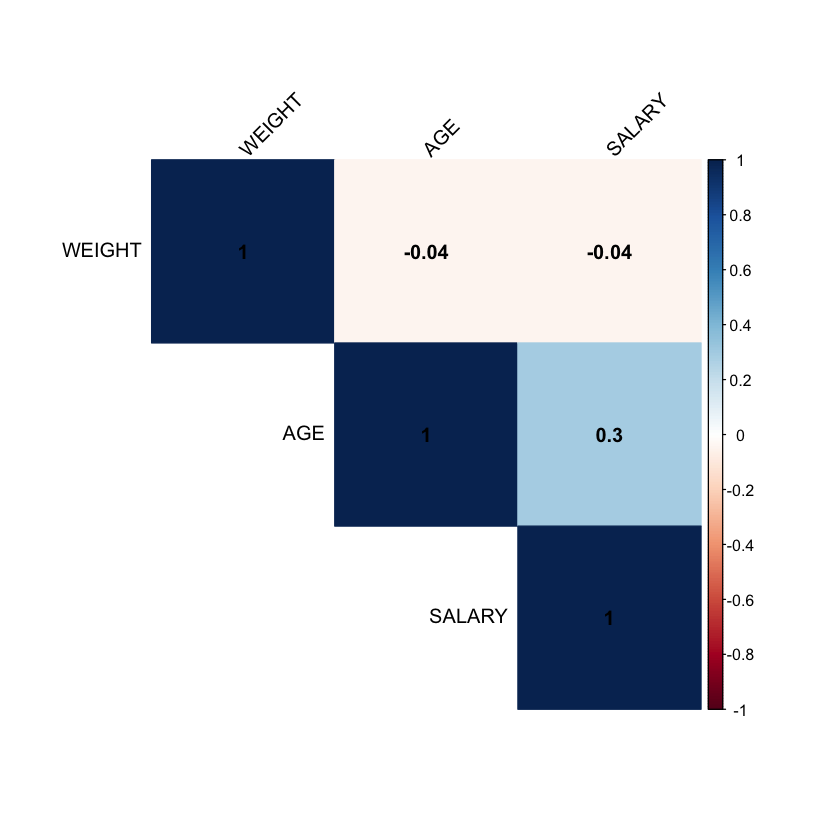

In [10]:
#correlation plot
corrplot(cor_numVar, type = "upper", order = "hclust",
         method = "color",
         tl.col = "black", tl.srt = 45,
         addCoef.col = "black", 
         insig = "blank")

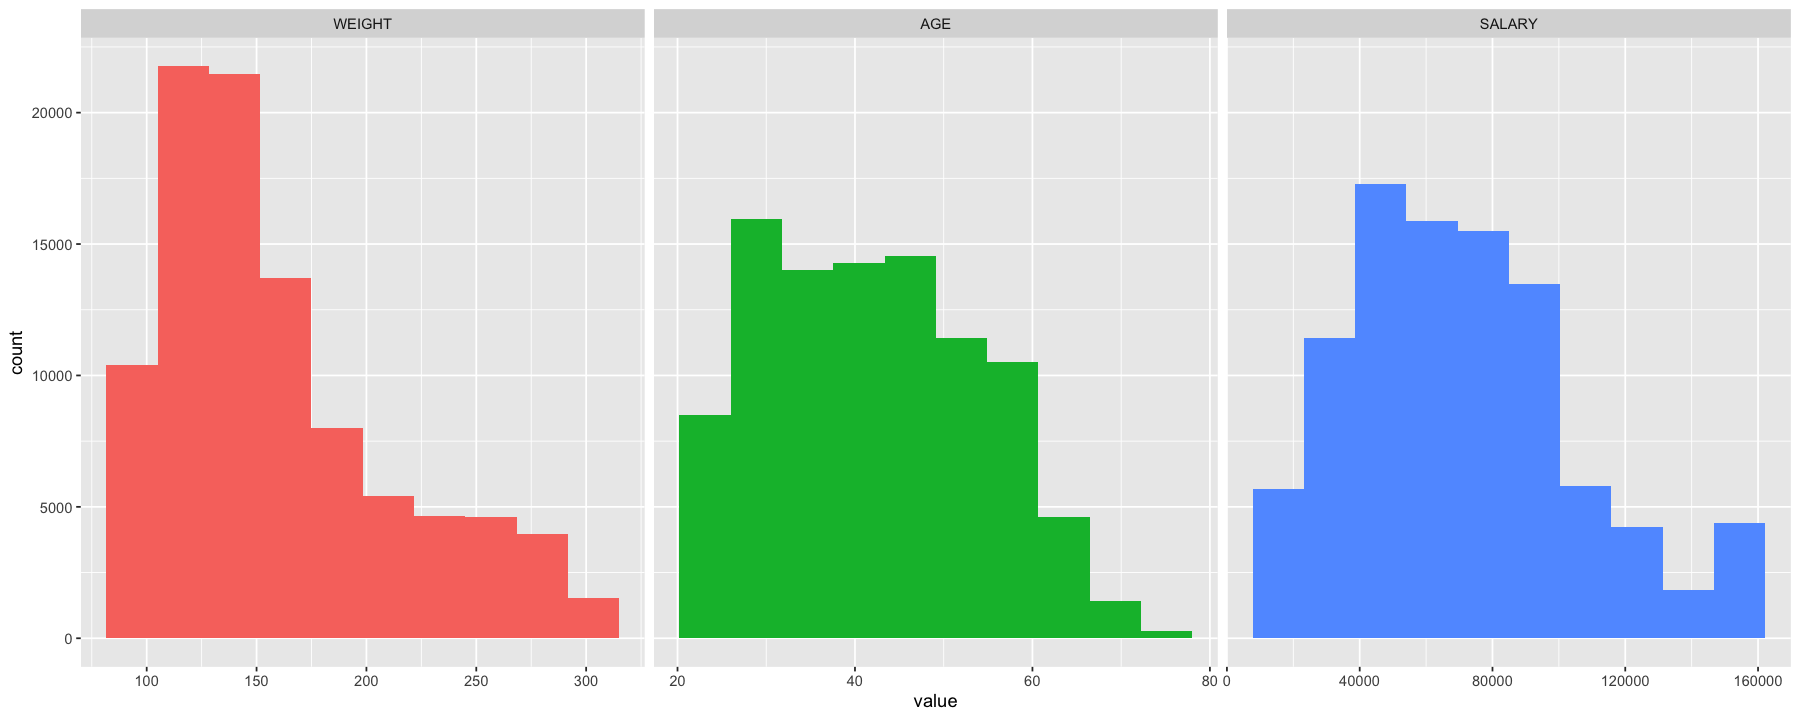

In [152]:
#visualize distributions of the continous variables
plot_num(ed)
options(repr.plot.width=15, repr.plot.height=12)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



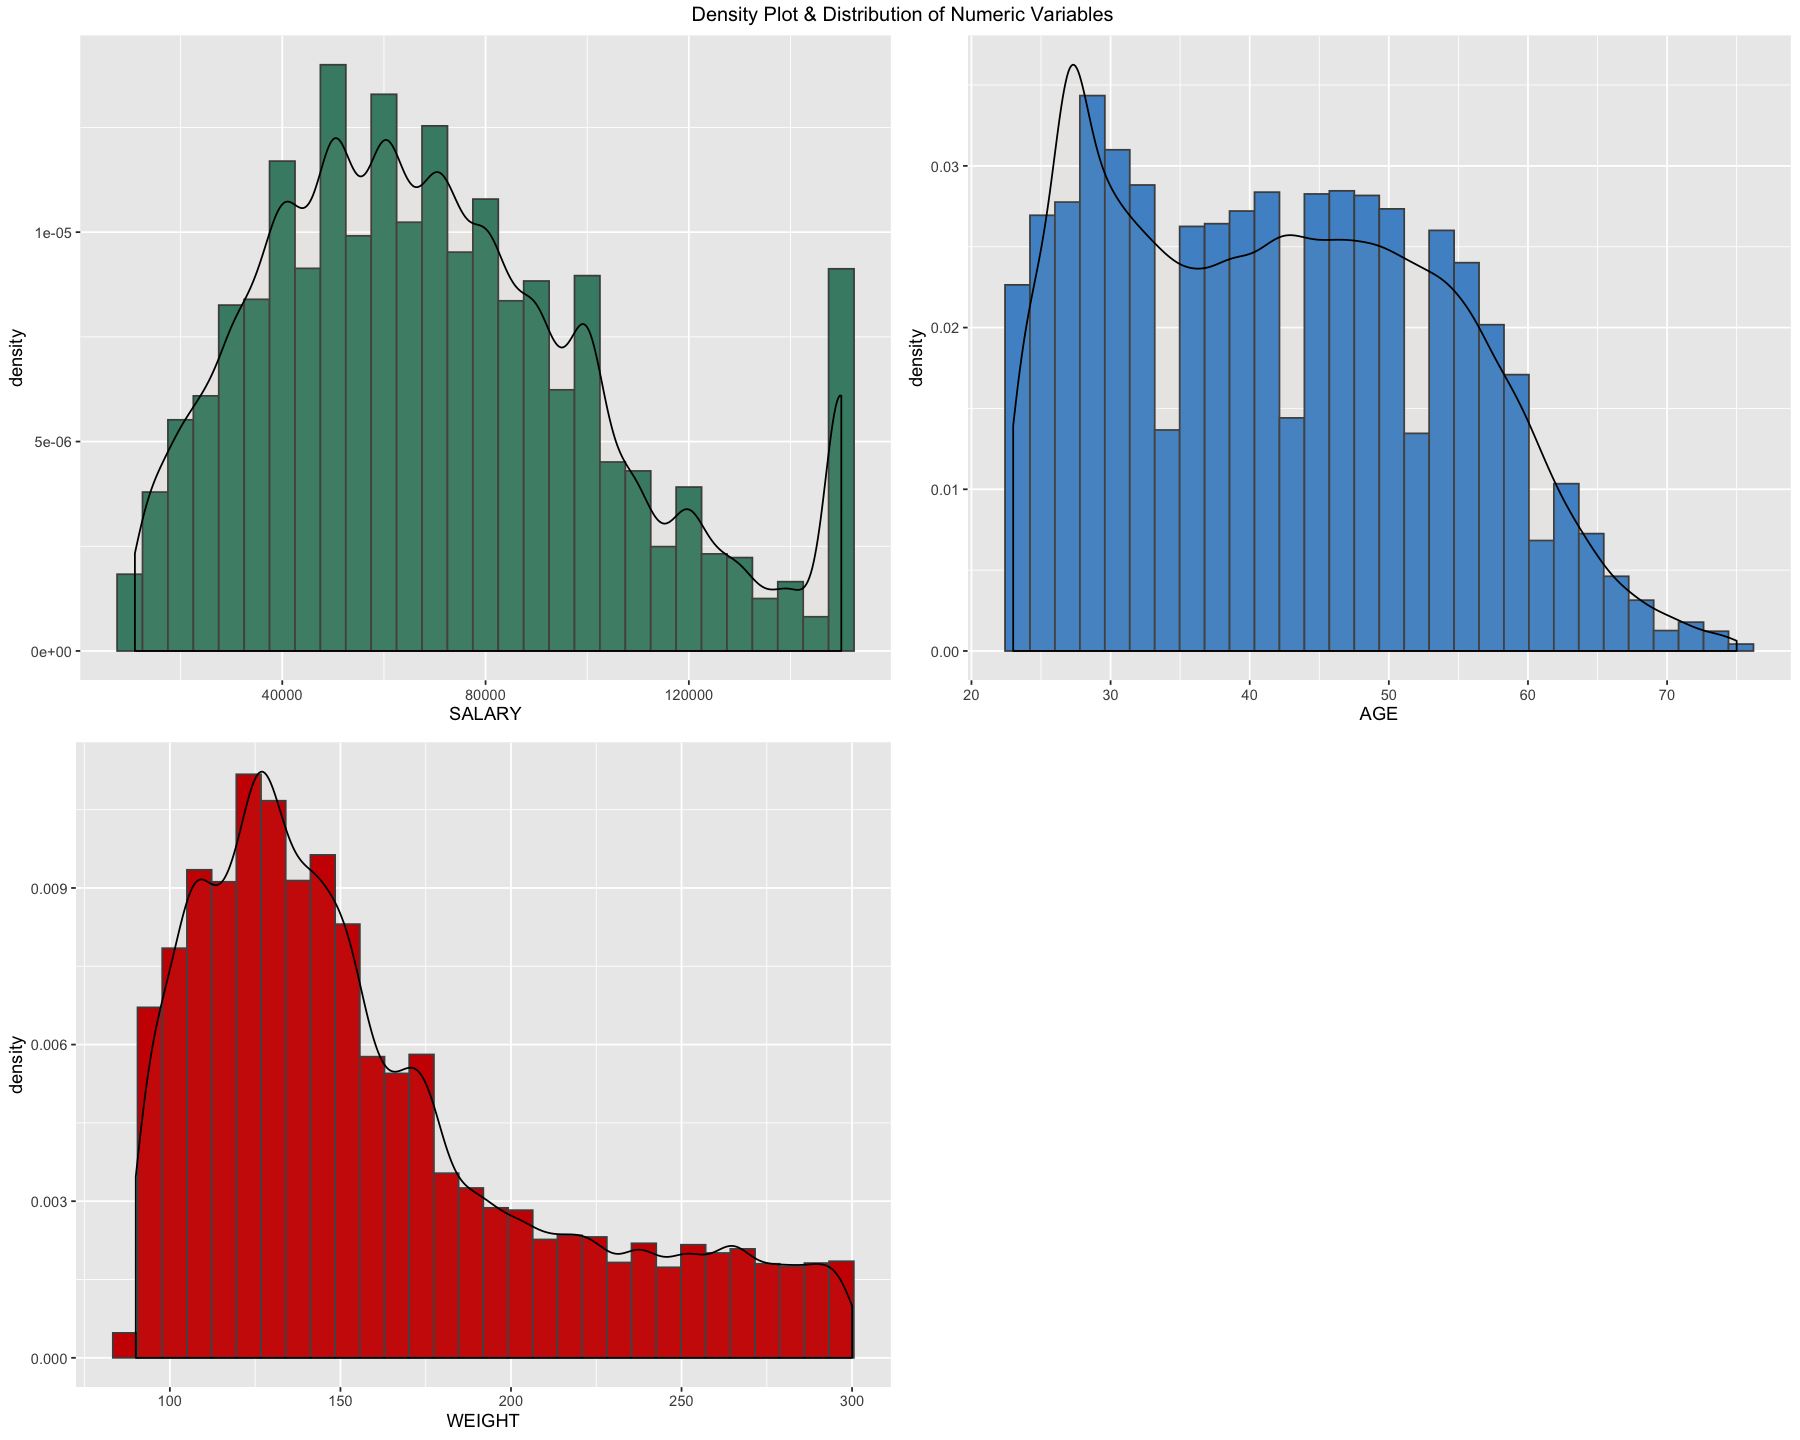

In [153]:
# denisty plots of Salaries, Age and Weight
p1 <- ggplot(ed, aes(SALARY)) +
  geom_histogram(aes(y = ..density..),
                 binwidth = 5000, color = "grey30", fill = "aquamarine4") + 
  geom_density(alpha = .05, fill = "antiquewhite3") 

p2 <- ggplot(ed, aes(AGE)) +
  geom_histogram(aes(y = ..density..), 
                 color = "grey30", fill = "steelblue3") + 
  geom_density(alpha = .05, fill = "antiquewhite3")

p3 <- ggplot(ed, aes(WEIGHT)) +
  geom_histogram(aes(y = ..density..), 
                 color = "grey30", fill = "red3") + 
  geom_density(alpha = .05, fill = "antiquewhite3")

gridExtra::grid.arrange(p1, p2, p3, nrow = 2, top = " Density Plot & Distribution of Numeric Variables")
options(repr.plot.width=15, repr.plot.height=12)

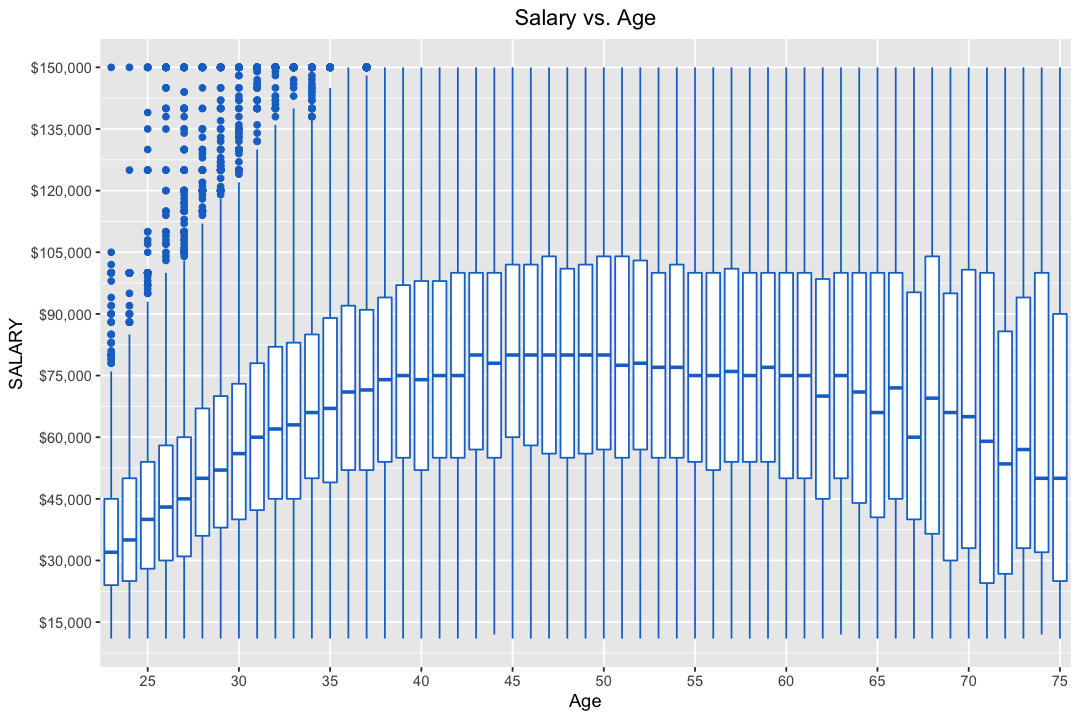

In [156]:
# salary as a function of age, weights boxplots
(p4 <- ggplot(ed[!is.na(ed$SALARY),], 
             aes(x=factor(AGE), y=SALARY))+
  geom_boxplot(col='dodgerblue3') + labs(x='Age') +
  scale_y_continuous(breaks= seq(0, 200000, by=15000), 
                     labels = scales::dollar) +
  scale_x_discrete(breaks = seq(0, 80, by = 5)) +
    labs(title = "Salary vs. Age") +
    theme(plot.title = element_text(hjust = 0.5)))
options(repr.plot.width=12, repr.plot.height=6)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



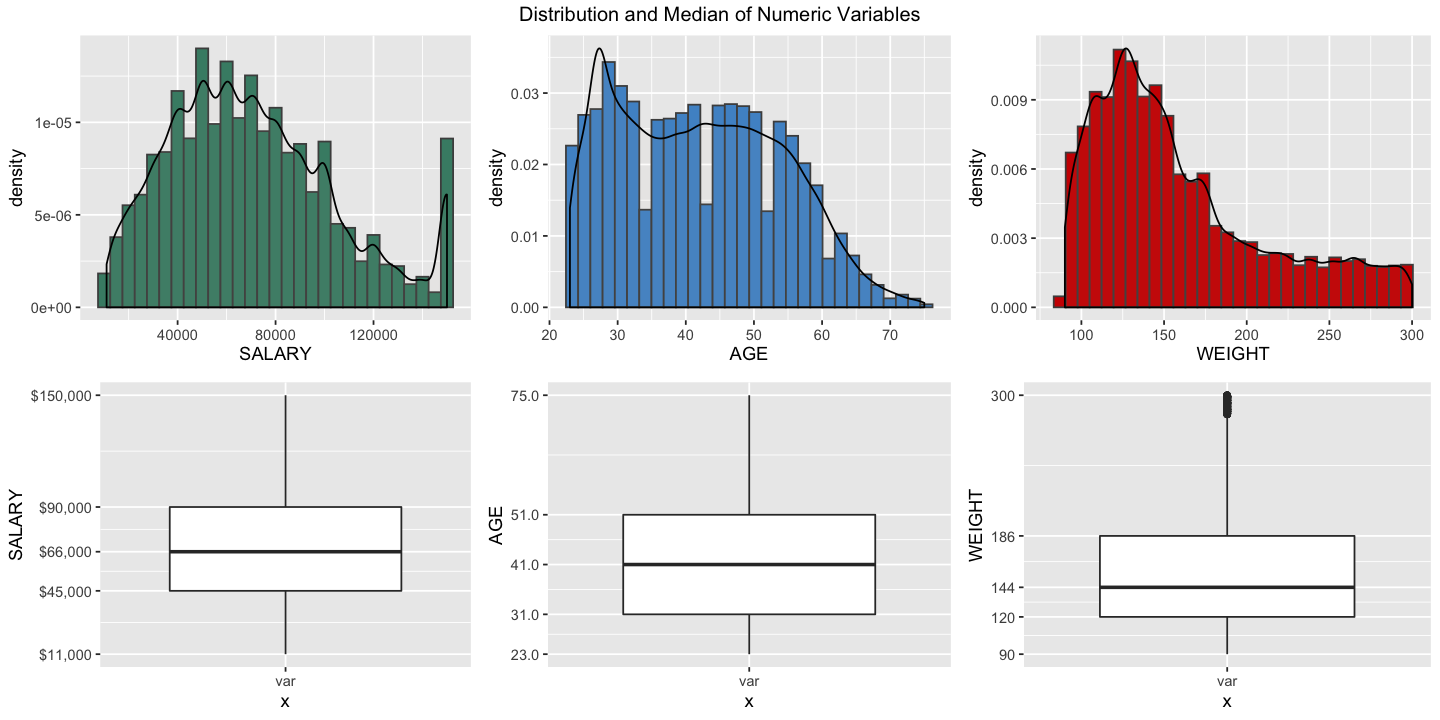

In [157]:
# boxplot of salary
p5 <- ggplot(ed, aes("var", SALARY)) +
  geom_boxplot(outlier.alpha = .25) +
  scale_y_continuous(
    labels = scales::dollar, 
    breaks = quantile(ed$SALARY)
  )

# boxplot of Age
p6 <- ggplot(ed, aes("var", AGE)) +
  geom_boxplot(outlier.alpha = 0.25 ) +
  scale_y_continuous(
    labels = scales::number,
    breaks = quantile(ed$AGE)
  )

# boxplot of weight
p7 <- ggplot(ed, aes("var", WEIGHT)) +
  geom_boxplot(outlier.alpha = 0.25) +
  scale_y_continuous(
    labels = scales::number,
    breaks = quantile(ed$WEIGHT)
  )

# combine and arrange overall boxplots
gridExtra::grid.arrange(p1, p2, p3, p5, p6, p7, nrow = 2, top = "Distribution and Median of Numeric Variables")
options(repr.plot.width=12, repr.plot.height=6)

### Exploring categorical variables

In [15]:
ed2 <- ed
attach(ed2)
# rename factor levels for understanding
ed2$GENDER <- plyr::revalue(GENDER, c("1" = "Female", "2" = "Male"))
ed2$MINRTY <- plyr::revalue(MINRTY, c("0" = "No", "1" = "Yes"))
ed2$RACETH <- plyr::revalue(RACETH, c("1" = "Asian", "2" = "White", "3" = "Minorities", "4"  = "Other"))
ed2$DGRDG <-  plyr::revalue(DGRDG, c("1" = "Bachelors", "2" = "Masters", "3" = "Doctorate", "4" = "Professional"))
ed2$OCEDRLP <- plyr::revalue(OCEDRLP, c("1" = "Closely related", "2" = "Somewhat related", "3" = "Not related"))
ed2$NOCPRMG <- plyr::revalue(NOCPRMG, c("1" = "Computer Scientists", "2" = "Other Scientists", 
                                        "3" = "Other Scientists", "4" = "Other Scientists", 
                                        "5" = "Engineers", "6" = "Other Scientists", "7" = "Non-Scientists"))

The following objects are masked from ed:

    AGE, BIRYR, DGRDG, GENDER, MINRTY, NOCPR, NOCPRMG, OCEDRLP, RACETH,
    SALARY, WEIGHT


The following `from` values were not present in `x`: 4



   BIRYR frequency percentage cumulative_perc
1   1960     12438      13.02           13.02
2   1955     11883      12.44           25.46
3   1975     11363      11.90           37.36
4   1970     11335      11.87           49.23
5   1980     11097      11.62           60.85
6   1965     10985      11.50           72.35
7   1950     10452      10.94           83.29
8   1945      6883       7.21           90.50
9   1985      4754       4.98           95.48
10  1940      2820       2.95           98.43
11  1935      1063       1.11           99.54
12  1930       271       0.28           99.82
13  1990       140       0.15           99.97
14  1925        41       0.04          100.00



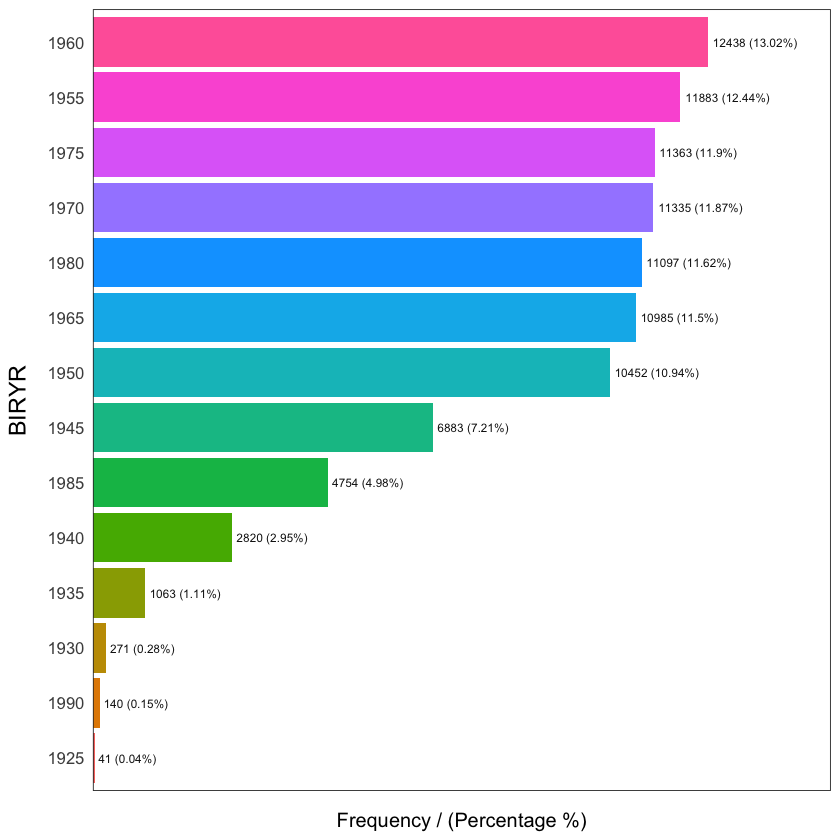

  GENDER frequency percentage cumulative_perc
1   Male     59835      62.64           62.64
2 Female     35690      37.36          100.00



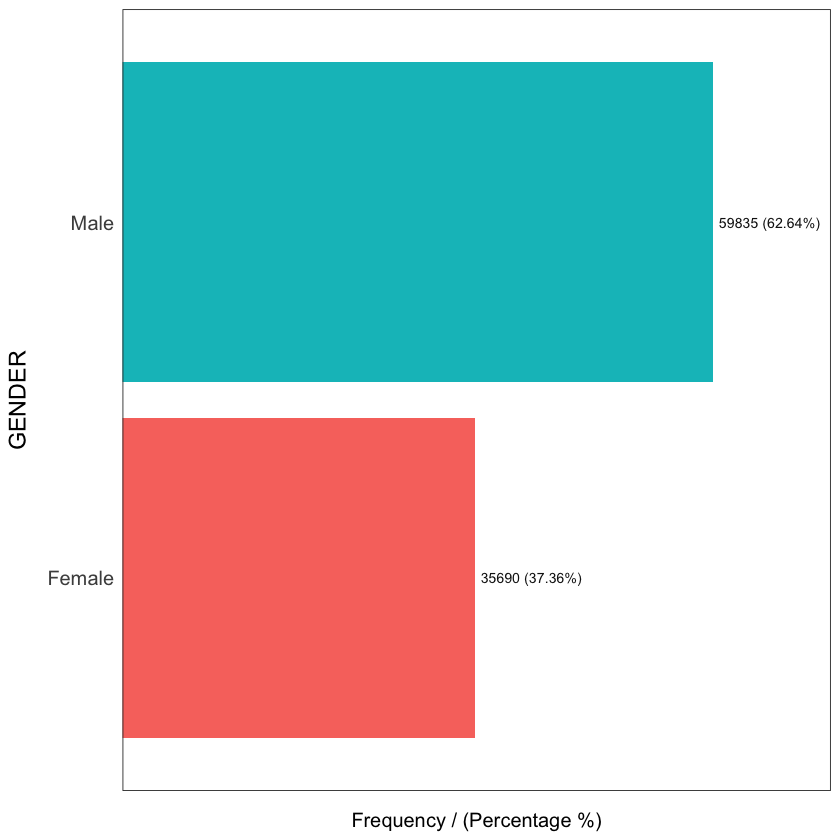

  MINRTY frequency percentage cumulative_perc
1     No     76276      79.85           79.85
2    Yes     19249      20.15          100.00



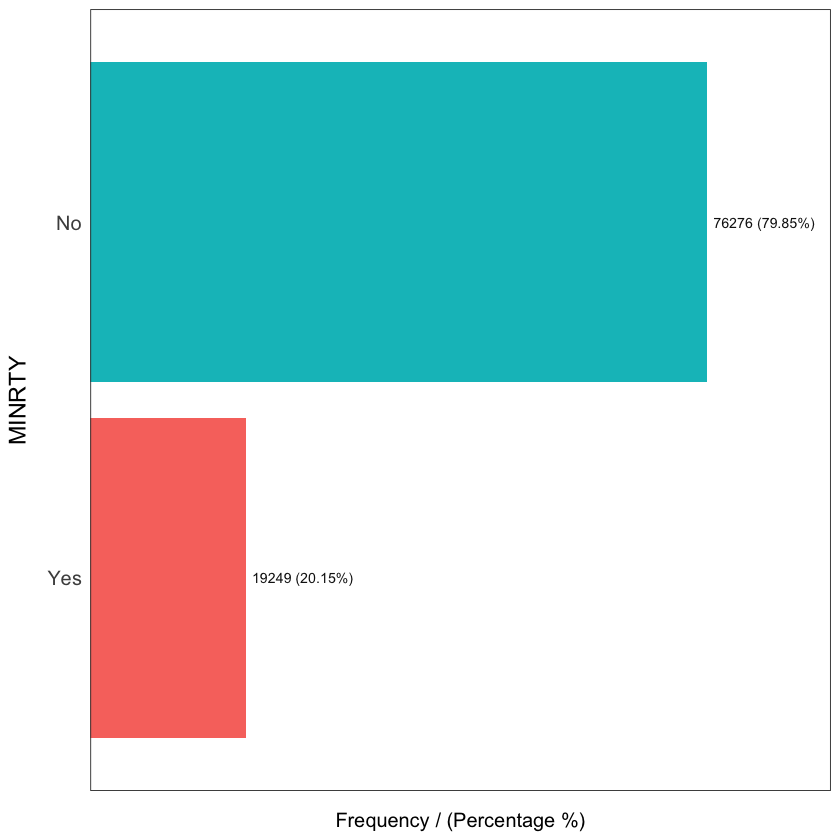

      RACETH frequency percentage cumulative_perc
1      White     72092      75.47           75.47
2 Minorities     19249      20.15           95.62
3      Asian      4184       4.38          100.00



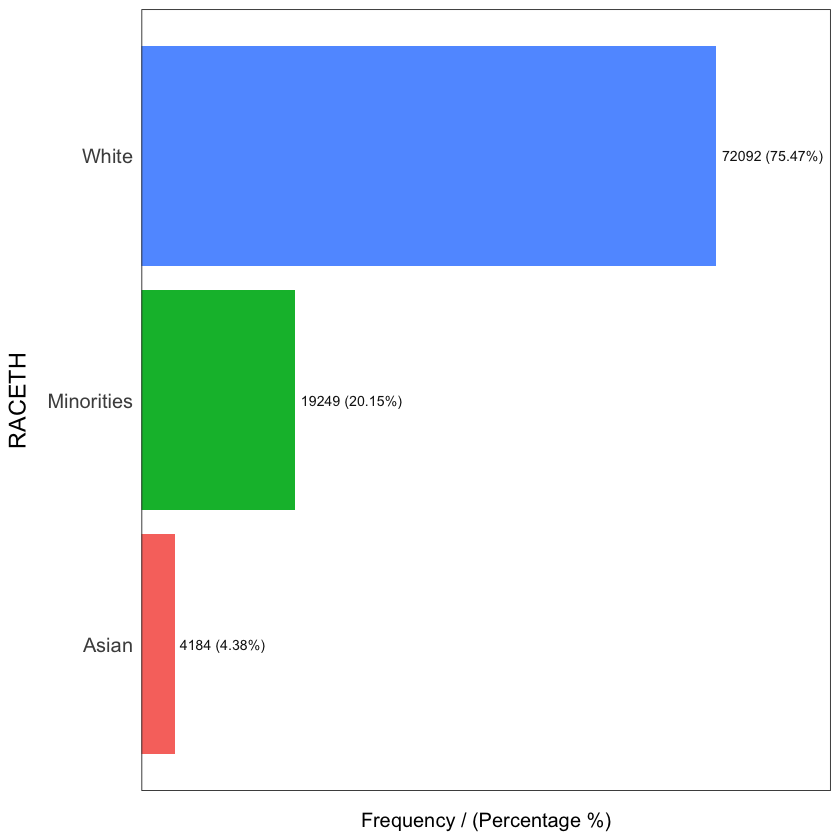

         DGRDG frequency percentage cumulative_perc
1    Bachelors     57178      59.86           59.86
2      Masters     31983      33.48           93.34
3 Professional      4578       4.79           98.13
4    Doctorate      1786       1.87          100.00



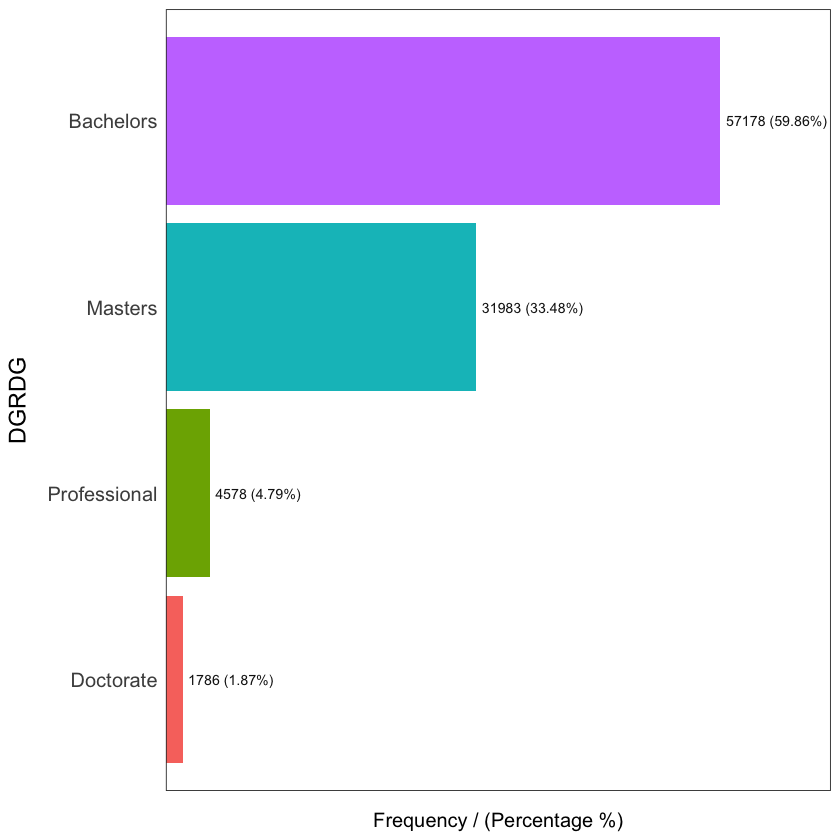

           OCEDRLP frequency percentage cumulative_perc
1  Closely related     57788      60.50           60.50
2 Somewhat related     24661      25.82           86.32
3      Not related     13076      13.69          100.00



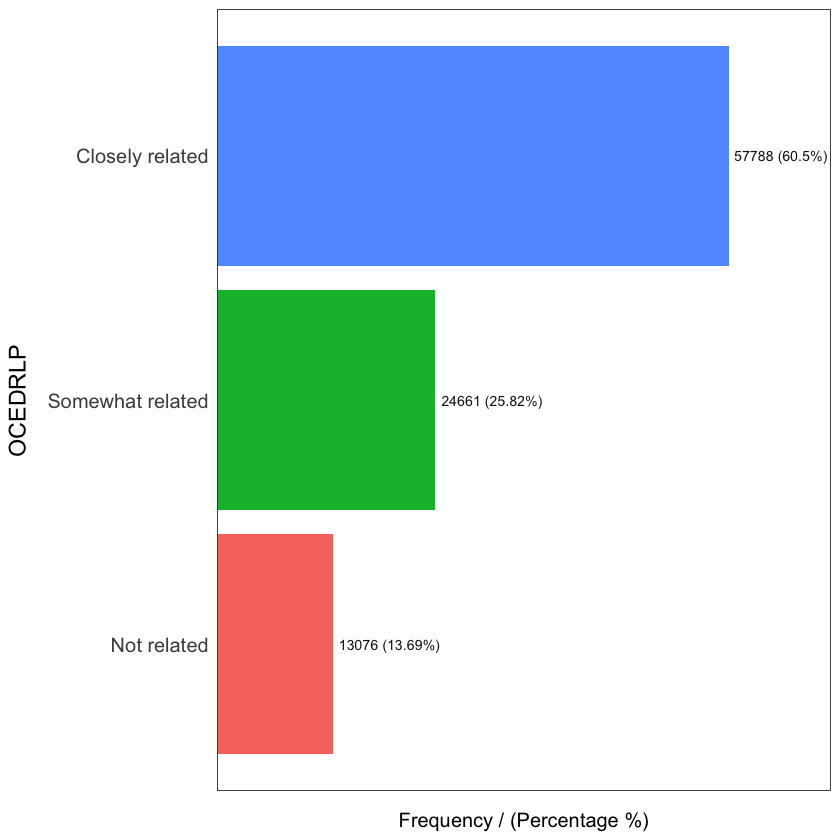

    NOCPR frequency percentage cumulative_perc
1  799995     16100      16.85           16.85
2  192895     15703      16.44           33.29
3  611995      8905       9.32           42.61
4  505005      6062       6.35           48.96
5  711995      5339       5.59           54.55
6  540890      4762       4.99           59.54
7  560940      4365       4.57           64.11
8  631995      4170       4.37           68.48
9  711410      3876       4.06           72.54
10 530860      3834       4.01           76.55
11 651995      3602       3.77           80.32
12 735995      3424       3.58           83.90
13 621995      3069       3.21           87.11
14 222205      2249       2.35           89.46
15 432360      1750       1.83           91.29
16 393995      1322       1.38           92.67
17 311930      1190       1.25           93.92
18 293995      1122       1.17           95.09
19 483995      1018       1.07           96.16
20 520850       920       0.96           97.12
21 182965    

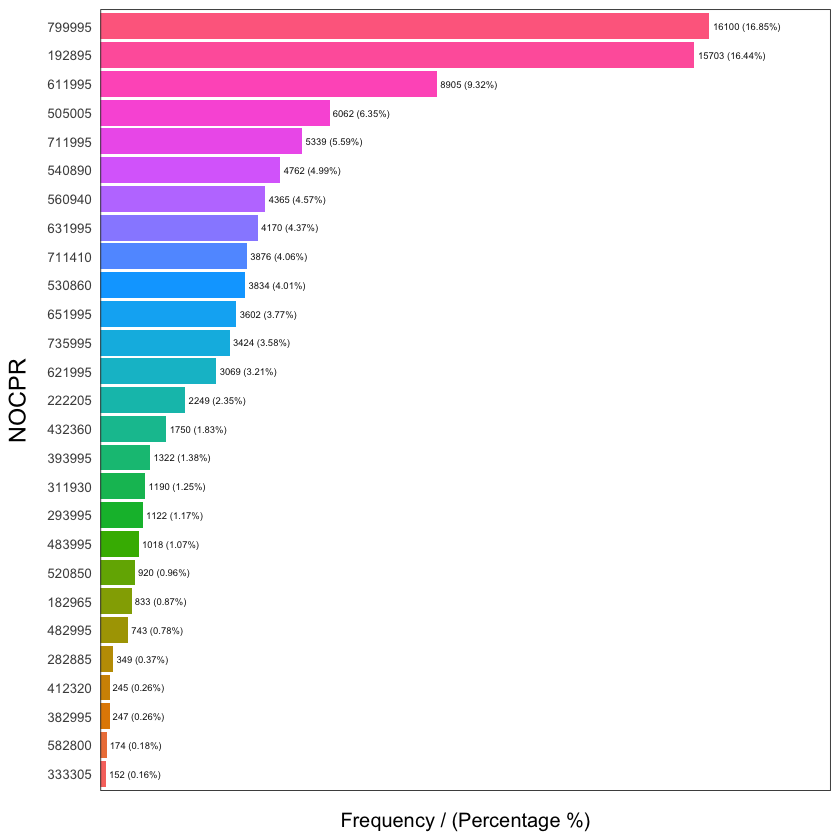

              NOCPRMG frequency percentage cumulative_perc
1    Other Scientists     30133      31.54           31.54
2      Non-Scientists     28739      30.09           61.63
3           Engineers     20117      21.06           82.69
4 Computer Scientists     16536      17.31          100.00



[1] "Variables processed: BIRYR, GENDER, MINRTY, RACETH, DGRDG, OCEDRLP, NOCPR, NOCPRMG"

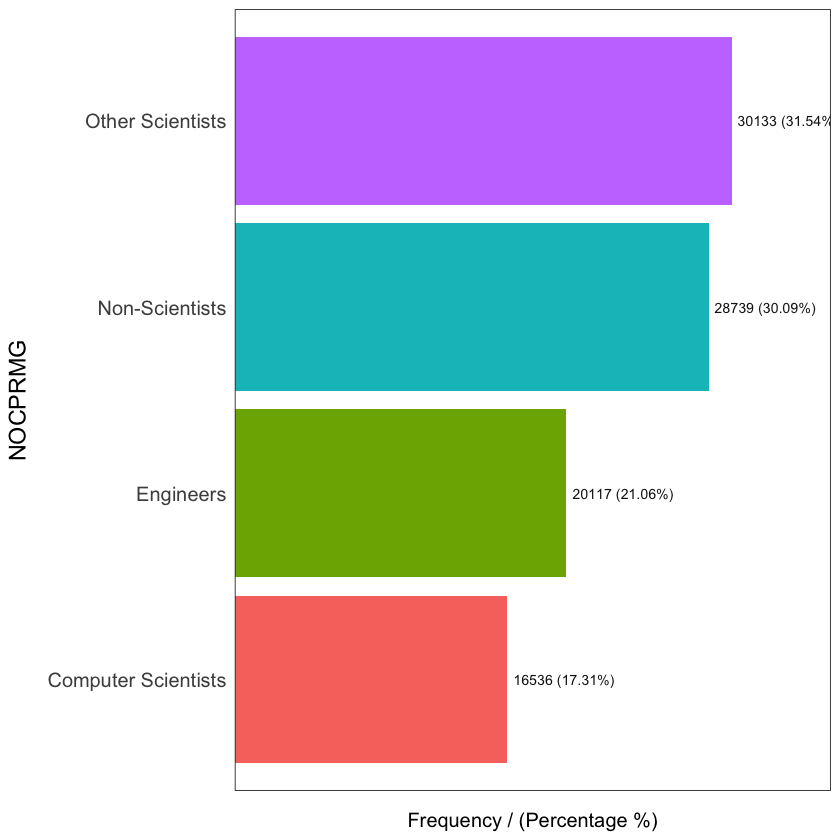

In [16]:
#check frequency of the factor variables
freq(ed2)

GENDER,avg_sal,sd_sal,med_sal,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
Female,58856.18,30612.64,53000,35690
Male,77324.26,33916.75,75000,59835


MINRTY,avg_sal,sd_sal,med_sal,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
No,71696.76,33567.20,69000,76276
Yes,65381.68,34825.01,60000,19249


RACETH,avg_sal,sd_sal,med_sal,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
Asian,74717.02,37252.29,68000,4184
White,71521.47,33332.71,69000,72092
Minorities,65381.68,34825.01,60000,19249


NOCPRMG,avg_sal,sd_sal,med_sal,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
Computer Scientists,76684.14,29323.04,75000,16536
Other Scientists,66229.71,34134.09,60000,30133
Engineers,82430.53,27286.02,80000,20117
Non-Scientists,62816.03,37240.83,53000,28739


DGRDG,avg_sal,sd_sal,med_sal,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
Bachelors,66761.64,31890.18,64000,57178
Masters,73151.96,34075.82,70000,31983
Doctorate,70720.60,32099.09,65000,1786
Professional,96996.72,43192.52,98000,4578


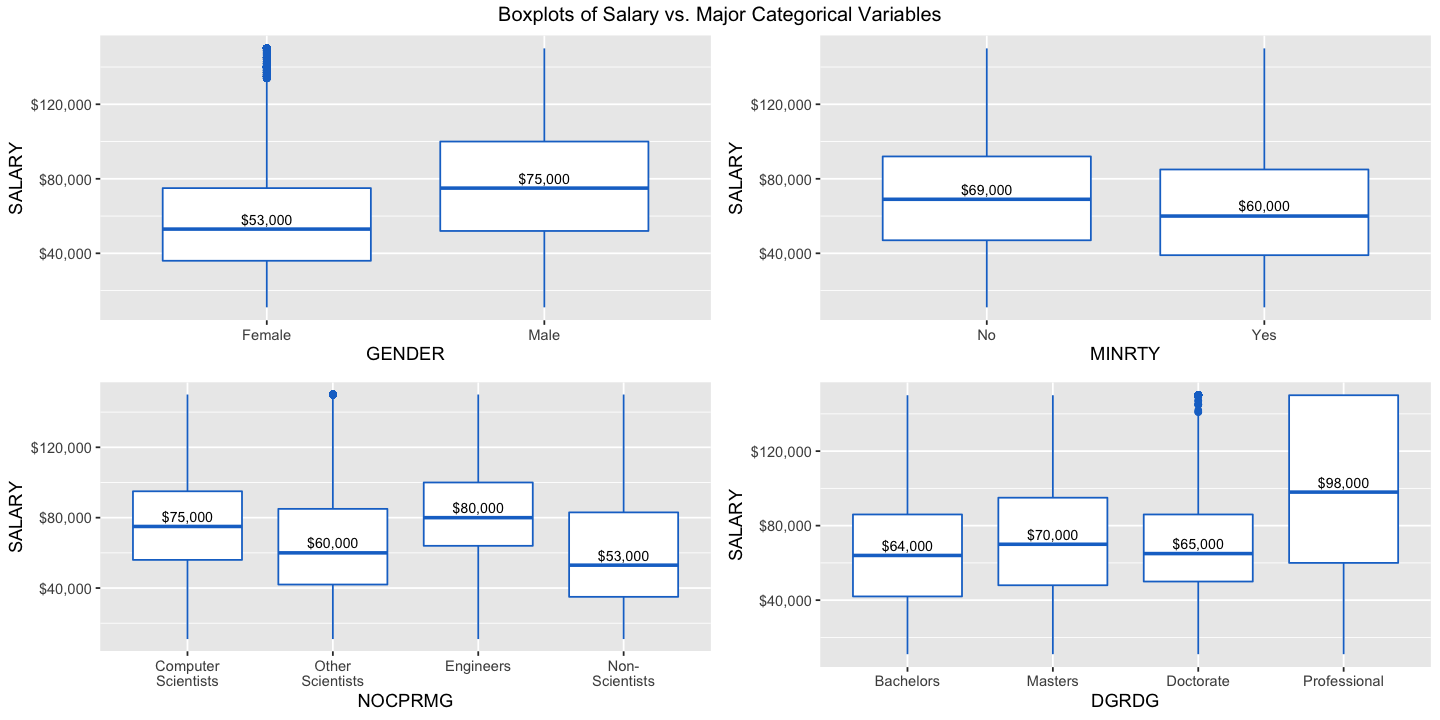

In [158]:
# plot boxplot of salary vs. gender 
(med_gender <- ed2 %>%
  group_by(GENDER) %>%
  summarise(
    avg_sal = mean(SALARY),
    sd_sal  = sd(SALARY),
    med_sal = median(SALARY),
    n       = n()
  ))
p8 <- ggplot(ed2, aes(x = GENDER, y = SALARY)) +
  geom_boxplot(col="dodgerblue3") +
  geom_text(data = med_gender, aes(GENDER, med_sal, 
                                   label = dollar(med_sal)),
            position = position_dodge(width = 0.8), 
            size = 3, vjust = -0.5) +
  scale_y_continuous(labels = scales::dollar) 

# plot boxplot of salary vs. minority class
(med_minrty <- ed2 %>%
  group_by(MINRTY) %>%
  summarise(
    avg_sal = mean(SALARY),
    sd_sal  = sd(SALARY),
    med_sal = median(SALARY),
    n       = n()
  ))
p9 <- ggplot(ed2, aes(x = MINRTY, y = SALARY)) +
  geom_boxplot(col="dodgerblue3") +
  geom_text(data = med_minrty, aes(MINRTY, med_sal, 
                                   label = dollar(med_sal)),
            position = position_dodge(width = 0.8), 
            size = 3, vjust = -0.5) +
  scale_y_continuous(labels = scales::dollar)

# plot boxplot of salary vs. race
(med_race <- ed2 %>%
  group_by(RACETH) %>%
  summarise(
    avg_sal = mean(SALARY),
    sd_sal  = sd(SALARY),
    med_sal = median(SALARY),
    n       = n()
  ))
p10 <- ggplot(ed2, aes(x = RACETH, y = SALARY)) +
  geom_boxplot(col="dodgerblue3") +
  geom_text(data = med_race, aes(RACETH, med_sal, 
                                   label = dollar(med_sal)),
            position = position_dodge(width = 0.8), 
            size = 3, vjust = -0.5) +
  scale_y_continuous(labels = scales::dollar)

# plot boxplot of salary vs. occupational group
(med_group <- ed2 %>%
  group_by(NOCPRMG) %>%
  summarise(
    avg_sal = mean(SALARY),
    sd_sal  = sd(SALARY),
    med_sal = median(SALARY),
    n       = n()
  ))
p11 <- ggplot(ed2, aes(x = NOCPRMG, y = SALARY)) +
  geom_boxplot(col="dodgerblue3") +
  geom_text(data = med_group, aes(NOCPRMG, med_sal, 
                                 label = dollar(med_sal)),
            position = position_dodge(width = 0.8), 
            size = 3, vjust = -0.5) +
  scale_y_continuous(labels = scales::dollar) +
    scale_x_discrete(labels = function(x) str_wrap(x, width = 10))

# plot salary vs. degree type
(med_degree <- ed2 %>%
  group_by(DGRDG) %>%
  summarise(
    avg_sal = mean(SALARY),
    sd_sal  = sd(SALARY),
    med_sal = median(SALARY),
    n       = n()
  ))
p12 <- ggplot(ed2, aes(x = DGRDG, y = SALARY)) +
    geom_boxplot(col="dodgerblue3") +
    geom_text(data = med_degree, aes(DGRDG, med_sal, 
                                    label = dollar(med_sal)),
              position = position_dodge(width = 0.8), 
              size = 3, vjust = -0.5) +
    scale_y_continuous(labels = scales::dollar)

#combine the plots together
gridExtra::grid.arrange(p8, p9, p11, p12, top = "Boxplots of Salary vs. Major Categorical Variables")
options(repr.plot.width=12, repr.plot.height=6)

NOCPRMG,GENDER,avg_sal,sd_sal,med_sal,n
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
Computer Scientists,Female,69015.59,27585.65,68000,4875
Computer Scientists,Male,79890.06,29434.31,80000,11661
Other Scientists,Female,58314.77,29203.08,53000,14725
Other Scientists,Male,73793.81,36695.92,66000,15408
Engineers,Female,74034.21,26785.04,71000,2163
Engineers,Male,83442.07,27171.93,80000,17954
Non-Scientists,Female,53515.11,31960.80,45000,13927
Non-Scientists,Male,71561.23,39657.27,64000,14812


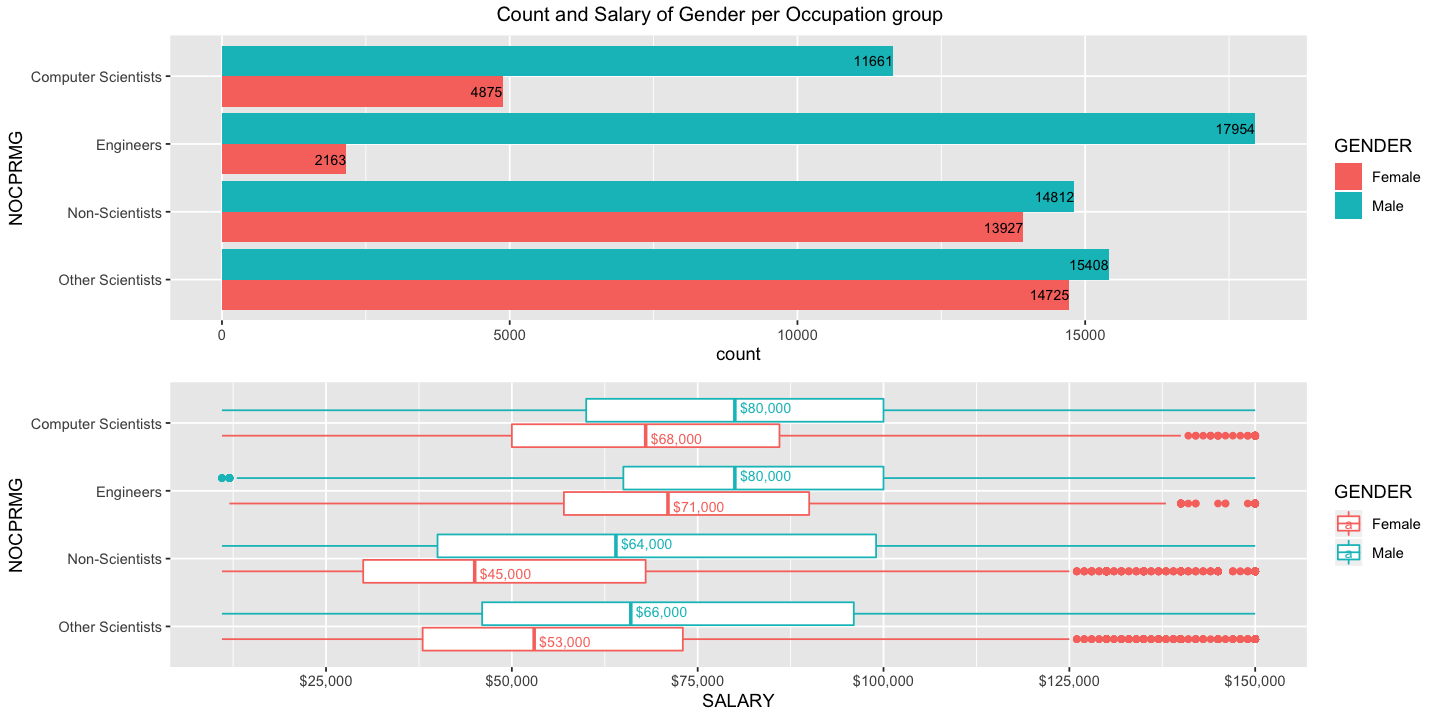

In [159]:
# plot of gender count by occupation group
p13 <- ggplot(ed2, aes(x=fct_infreq(NOCPRMG), y = ..count..,
                       fill = GENDER)) +
  geom_bar(position = "dodge", group = 2) +
  geom_text(stat='count', aes(label=..count..), 
            position = position_dodge(0.9),
            size = 3, hjust = 1) +
    xlab("NOCPRMG") +
  coord_flip()


# plot salary of gender per occupation group
(med_sal_gender <- ed2 %>%
    group_by(NOCPRMG, GENDER) %>%
    summarise(
      avg_sal = mean(SALARY),
      sd_sal  = sd(SALARY),
      med_sal = median(SALARY),
      n       = n()
    ))
p14 <- ggplot(ed2, aes(x=fct_infreq(NOCPRMG),
                       y=SALARY,
                       color = GENDER)) +
    geom_boxplot() +
    geom_text(data = med_sal_gender, aes(NOCPRMG, med_sal, 
                                         label = dollar(med_sal)),
              position = position_dodge(width = 0.9), 
              size = 3, hjust = -0.1) +
    scale_y_continuous(labels = scales::dollar,
                     breaks = seq(0, 200000, 25000)) +
    xlab("NOCPRMG") +
  coord_flip()

# combine plots of gender occupation and salary
gridExtra::grid.arrange(p13, p14, nrow = 2, top = "Count and Salary of Gender per Occupation group")
options(repr.plot.width=12, repr.plot.height=6)

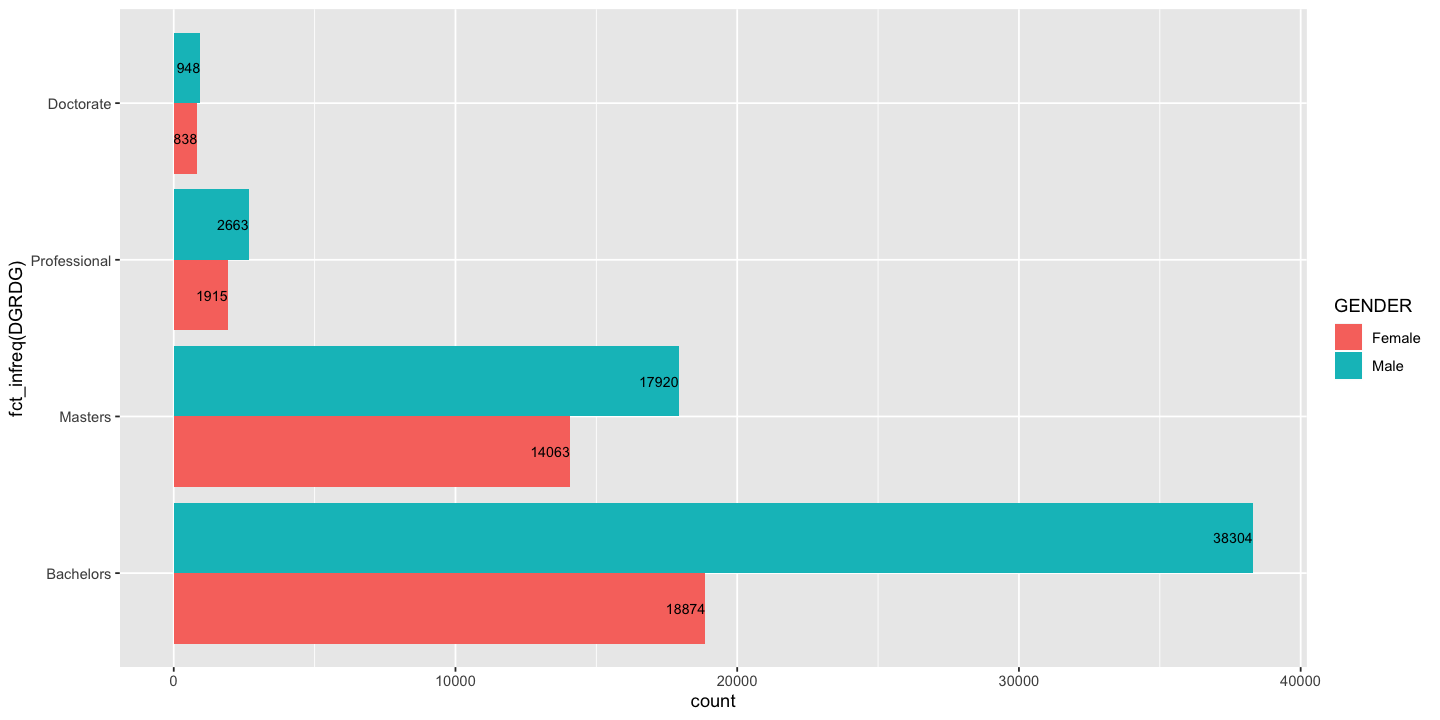

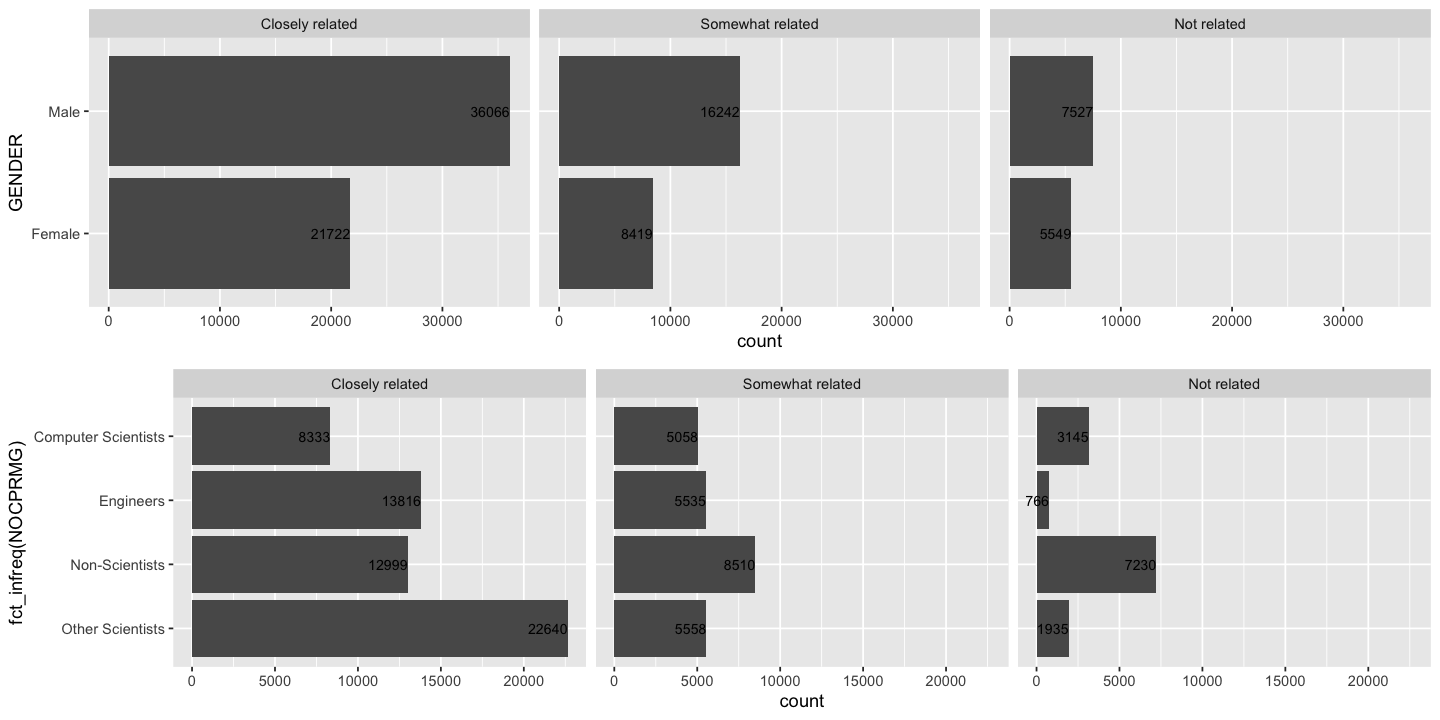

In [162]:
# plot of gender count by degree type 
(p15 <- ggplot(ed2, aes(x=fct_infreq(DGRDG), fill = GENDER)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), 
            position = position_dodge(0.9),
            size = 3, hjust = 1) +
  coord_flip())

# plot of related  job by gender
p16 <- ggplot(ed2, aes(x=GENDER)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), 
            position = position_dodge(0.9),
            size = 3, hjust = 1) +
  facet_wrap(~ OCEDRLP) +
  coord_flip()

# plot of related job by occupation
p17 <- ggplot(ed2, aes(x=fct_infreq(NOCPRMG))) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), 
            position = position_dodge(0.9),
            size = 3, hjust = 1) +
  facet_wrap(~ fct_infreq(OCEDRLP)) +
  coord_flip()

# plot of related job by degree
p18 <- ggplot(ed2, aes(x=fct_infreq(DGRDG))) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), 
            position = position_dodge(0.9),
            size = 3, hjust = 1) +
  facet_wrap(~ fct_infreq(OCEDRLP)) +
  coord_flip()

gridExtra::grid.arrange(p16, p17, nrow = 2)

## <center> Machine Learning Model Building </center>

In [20]:
data <- higher_edu
names(data)
attach(data)

[1] "WEIGHT"  "AGE"     "BIRYR"   "GENDER"  "MINRTY"  "RACETH"  "DGRDG"  
 [8] "OCEDRLP" "NOCPR"   "NOCPRMG" "SALARY"

The following objects are masked from ed2:

    AGE, BIRYR, DGRDG, GENDER, MINRTY, NOCPR, NOCPRMG, OCEDRLP, RACETH,
    SALARY, WEIGHT


The following objects are masked from ed:

    AGE, BIRYR, DGRDG, GENDER, MINRTY, NOCPR, NOCPRMG, OCEDRLP, RACETH,
    SALARY, WEIGHT




In [21]:
# creating factor levels
factored_data <- data %>%
  mutate(GENDER = factor(GENDER), MINRTY = factor(MINRTY), RACETH = factor(RACETH),
         DGRDG = factor(DGRDG), OCEDRLP = factor(OCEDRLP), NOCPR = factor(NOCPR),
         NOCPRMG = factor(NOCPRMG))

In [22]:
#splitting the data
set.seed(9955) #(123)
split <- createDataPartition(SALARY, p=.75, list = FALSE)
train <- data[split, ]; 
test <- data[-split,]; 
y_test <- data[-split, 7]

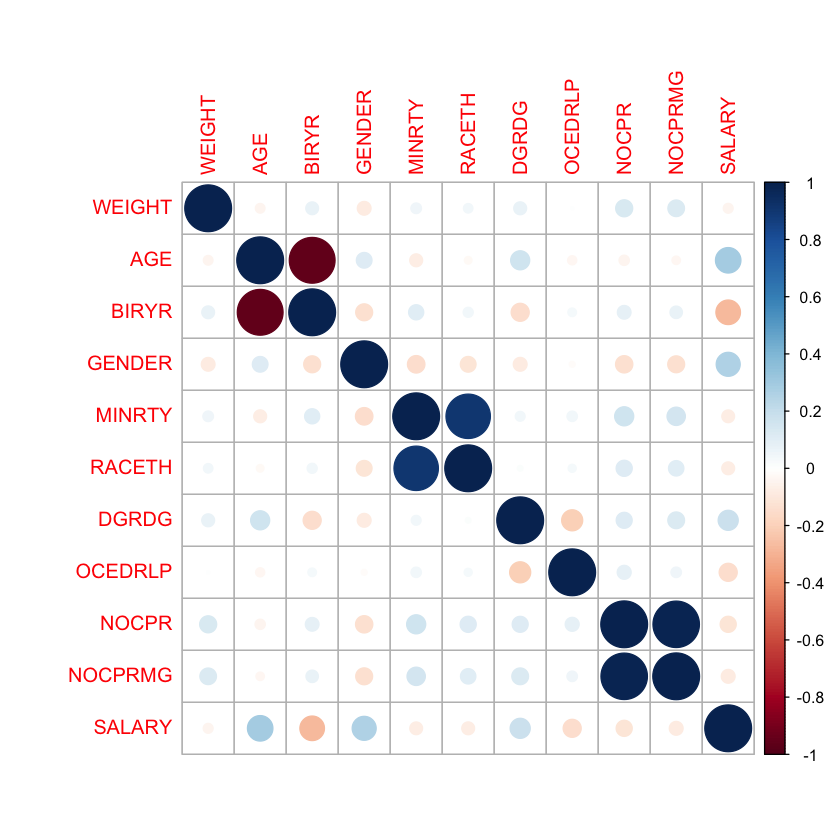

In [23]:
# plotting correlation plot
cor_data <- cor(data)
corrplot(cor_data)

### Generalized Linear Model

In [24]:
# glm
attach(data)
set.seed(189)

# Building a linear model with 'raw data'
mod.linear <- glm(log(SALARY)~., data = train)

# without multicollinearity
mod.linear.partial <- glm(log(SALARY)~WEIGHT+AGE+GENDER+MINRTY+DGRDG+OCEDRLP
                          +NOCPRMG, data = train)

The following objects are masked from data (pos = 3):

    AGE, BIRYR, DGRDG, GENDER, MINRTY, NOCPR, NOCPRMG, OCEDRLP, RACETH,
    SALARY, WEIGHT


The following objects are masked from ed2:

    AGE, BIRYR, DGRDG, GENDER, MINRTY, NOCPR, NOCPRMG, OCEDRLP, RACETH,
    SALARY, WEIGHT


The following objects are masked from ed:

    AGE, BIRYR, DGRDG, GENDER, MINRTY, NOCPR, NOCPRMG, OCEDRLP, RACETH,
    SALARY, WEIGHT




In [25]:
# predicting the train data
pred.linear.train <- predict(mod.linear, train)
mse(pred.linear.train, log(train$SALARY))


# predicting 'raw' data without multicollinearity
pred.partial.train <- predict(mod.linear.partial, train)
mse(pred.partial.train, log(train$SALARY)) 

[1] 0.2382051

[1] 0.2459386

In [26]:
# checking the summary
summary(mod.linear)


Call:
glm(formula = log(SALARY) ~ ., data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.41452  -0.25663   0.05793   0.32680   1.51419  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.443e-01  1.025e+00   0.531    0.595    
WEIGHT      -2.631e-04  3.521e-05  -7.471 8.04e-14 ***
AGE          1.487e-02  5.382e-04  27.626  < 2e-16 ***
BIRYR        5.099e-03  5.105e-04   9.988  < 2e-16 ***
GENDER       2.589e-01  3.882e-03  66.692  < 2e-16 ***
MINRTY       1.080e-01  1.084e-02   9.966  < 2e-16 ***
RACETH      -1.145e-01  9.146e-03 -12.518  < 2e-16 ***
DGRDG        8.406e-02  2.539e-03  33.113  < 2e-16 ***
OCEDRLP     -6.575e-02  2.663e-03 -24.693  < 2e-16 ***
NOCPR       -2.497e-06  5.502e-08 -45.377  < 2e-16 ***
NOCPRMG      2.092e-01  5.239e-03  39.927  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2382417)

    Null devian

In [27]:
vif(mod.linear) # see if multicolinearity exist in the model

WEIGHT       AGE     BIRYR    GENDER    MINRTY    RACETH     DGRDG   OCEDRLP 
 1.039218 12.492985 12.645636  1.059266  5.690225  5.528449  1.115912  1.114129 
    NOCPR   NOCPRMG 
38.973509 38.528675

In [28]:
# prediction for linear model with the test set
pred.linear.test <- predict(mod.linear, test)
mse(pred.linear.test, log(test$SALARY))
rmse(pred.linear.test, log(test$SALARY)) 
rmsle(pred.linear.test, log(test$SALARY))

[1] 0.2380036

[1] 0.4878561

[1] 0.04135854

In [29]:
pred.partial.test <- predict(mod.linear.partial, test)
mse(pred.partial.test, log(test$SALARY))

[1] 0.2461512

it seems that multicollinearity doesn't affect the generalization
power of the model. <br>
Actually, without those variables the model seems to lose some accuracy power <br>


let us try to use a factorized data and see the performance of the linear models

In [30]:
# splitting the factored data
idx <- createDataPartition(factored_data$SALARY, p=.75, list = FALSE)
fc_train <- factored_data[idx,]
fc_test <- factored_data[-idx,]

In [31]:
# linear model with multicolinearity
set.seed(2020)
fc.linear <- glm(log(SALARY)~., data = fc_train)
pred.fc <- predict(fc.linear, fc_train)
mse(pred.fc, log(fc_train$SALARY))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] 0.1936433

In [32]:
# prediction with test set
pred.fc.test <- predict(fc.linear, fc_test)
mse(pred.fc.test, log(fc_test$SALARY))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] 0.1926759

In [33]:
# linear models without multicolinearity
fc.linear.partial <- glm(log(SALARY)~WEIGHT+AGE+GENDER+MINRTY+DGRDG+OCEDRLP
    +NOCPRMG, data = fc_train)

summary(fc.linear.partial)

pred.fc.partial <- predict(fc.linear.partial, fc_train)
mse(pred.fc.partial, log(fc_train$SALARY))


Call:
glm(formula = log(SALARY) ~ WEIGHT + AGE + GENDER + MINRTY + 
    DGRDG + OCEDRLP + NOCPRMG, data = fc_train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.45211  -0.25282   0.04207   0.31361   1.46506  

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.062e+01  1.016e-02 1045.261  < 2e-16 ***
WEIGHT      -6.410e-05  3.536e-05   -1.813  0.06983 .  
AGE          9.947e-03  1.552e-04   64.099  < 2e-16 ***
GENDER2      2.005e-01  3.983e-03   50.323  < 2e-16 ***
MINRTY1     -1.495e-02  4.647e-03   -3.218  0.00129 ** 
DGRDG2       9.441e-02  4.084e-03   23.116  < 2e-16 ***
DGRDG3       1.177e-01  1.372e-02    8.581  < 2e-16 ***
DGRDG4       4.146e-01  8.991e-03   46.111  < 2e-16 ***
OCEDRLP2    -1.055e-02  4.347e-03   -2.428  0.01519 *  
OCEDRLP3    -2.190e-01  5.723e-03  -38.276  < 2e-16 ***
NOCPRMG2    -3.814e-01  1.011e-02  -37.738  < 2e-16 ***
NOCPRMG3    -2.301e-01  1.123e-02  -20.484  < 2e-16 ***
NOCPRMG4    -4.2

[1] 0.2303793

In [34]:
# prediction with test set
pred.fc.p_test <- predict(fc.linear.partial, fc_test)
mse(pred.fc.p_test, log(fc_test$SALARY))

[1] 0.2258557

In [35]:
# we can also use anova to compare the two models
anova(fc.linear, fc.linear.partial)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,71608,13873.77,NA,NA
2,71630,16505.75,-22,-2631.988


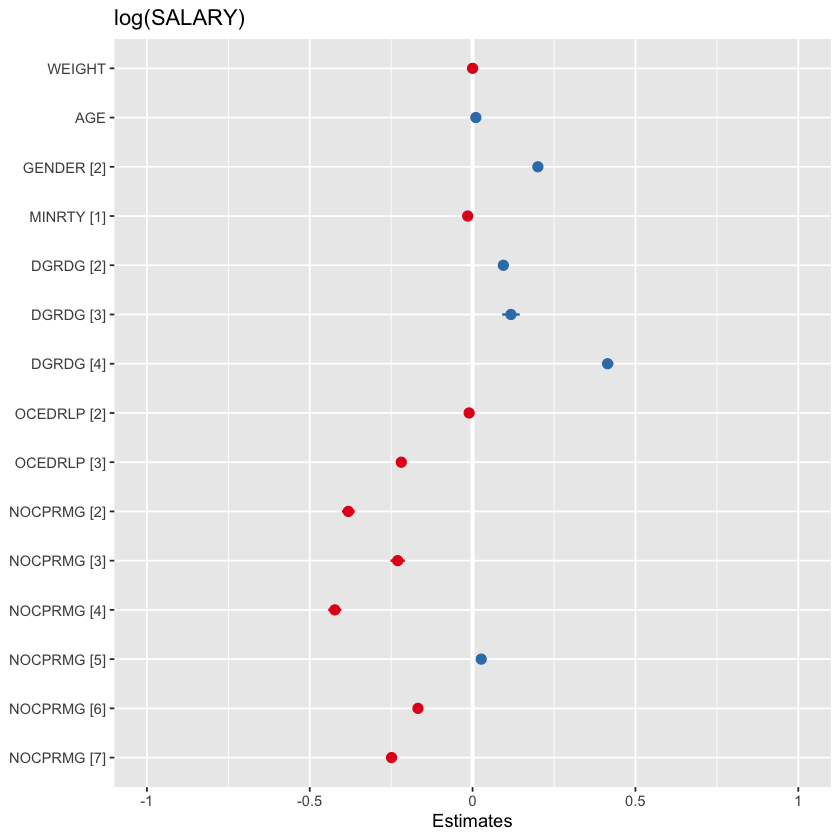

In [36]:
# plotting linear model variable importance
plot_model(fc.linear.partial)

So the linear model generalizes better with multicolinearity which means multicolinearity only damages the coefficients not the overall model <br>

let us look at the variable importance of the winning model

### Tree-based models

### Decision Tree: Rpart

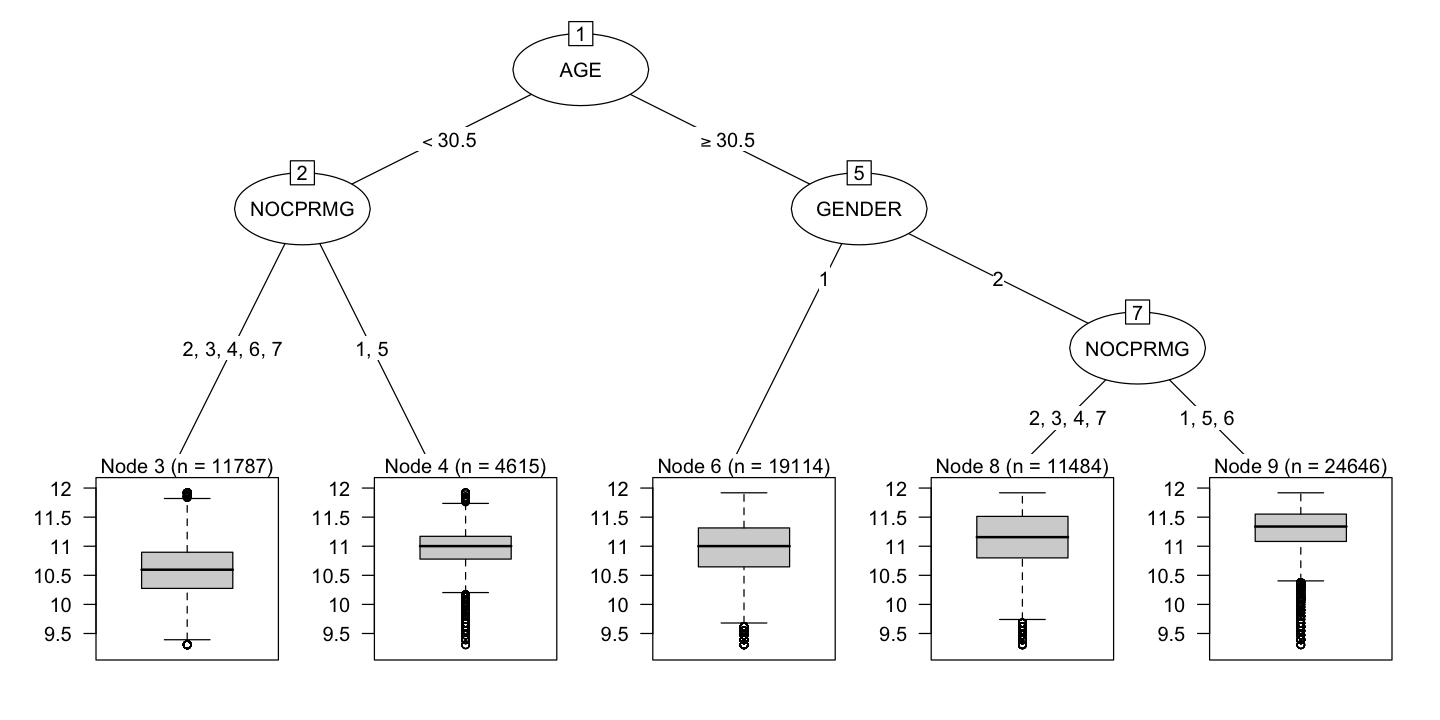

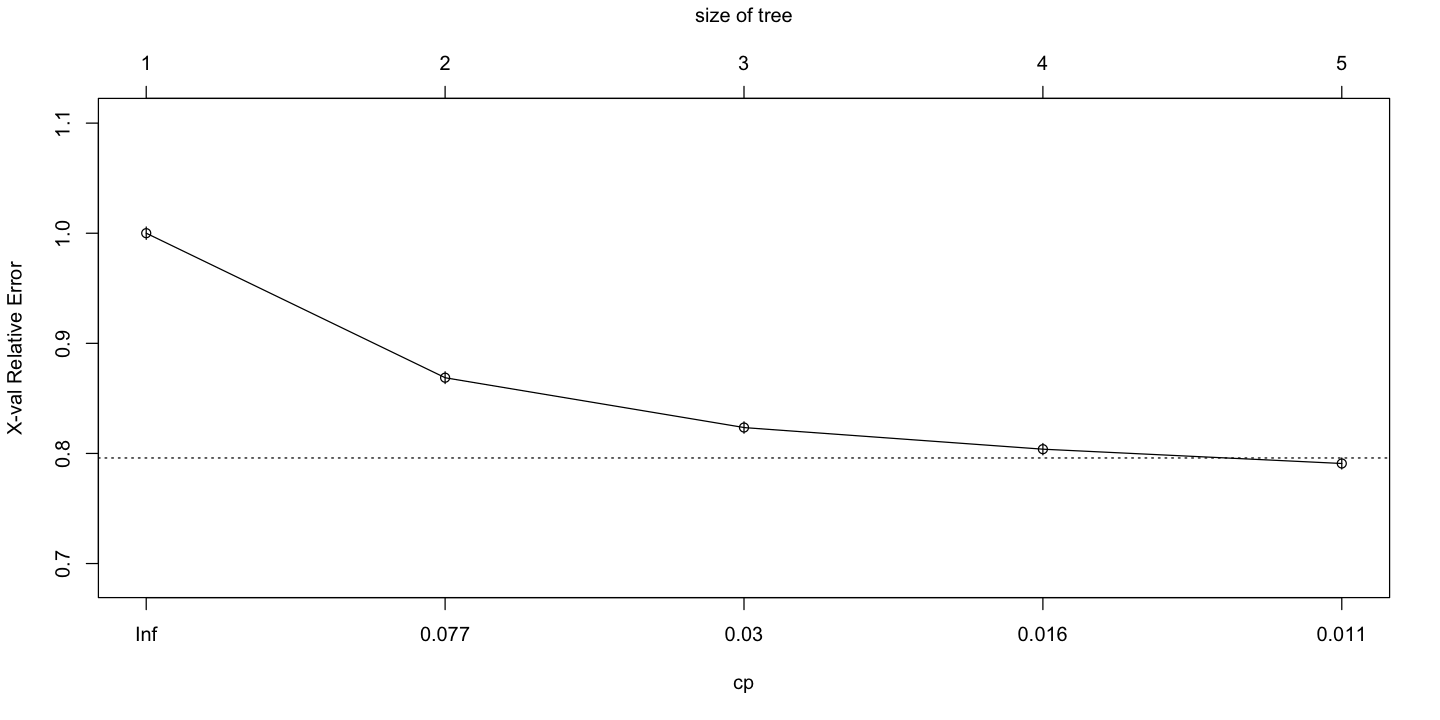

          CP nsplit rel error    xerror        xstd
1 0.13125226      0 1.0000000 1.0000495 0.005617719
2 0.04526004      1 0.8687477 0.8688012 0.005340080
3 0.01968650      2 0.8234877 0.8235447 0.005170664
4 0.01300803      3 0.8038012 0.8038733 0.005171615
5 0.01000000      4 0.7907932 0.7908750 0.005011299


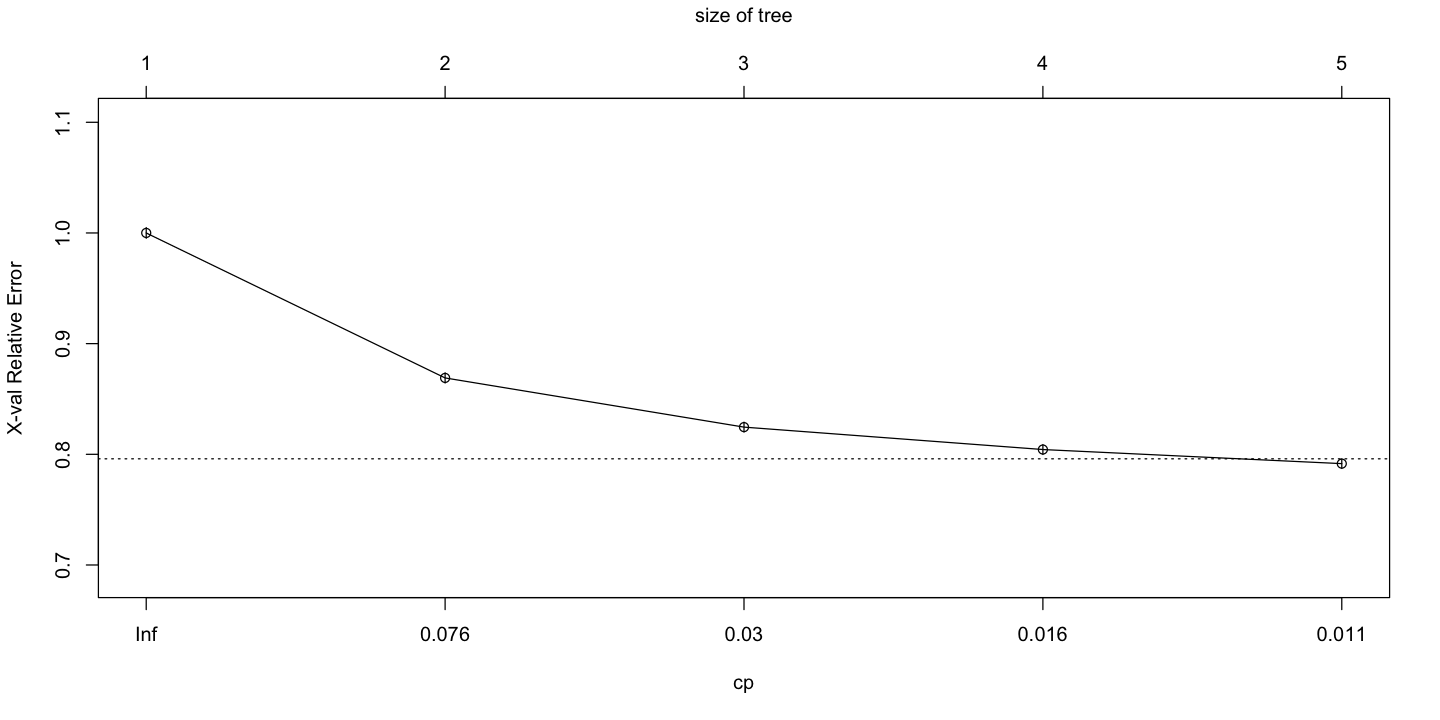

In [163]:
set.seed(2341)
rpart.mod <- rpart(log(SALARY)~ AGE + GENDER + WEIGHT + NOCPRMG + 
                   DGRDG + OCEDRLP, data = fc_train, method = "anova")
rpart.party <- as.party(rpart.mod)
plot(rpart.party)

plotcp(rpart.mod)
print(rpart.mod$cptable)
options(repr.plot.width=12, repr.plot.height=6)

In [147]:
# Retrieve optimal cp value based on cross-validated error
(cp.idx <- which.min(rpart.mod$cptable[,'xerror']))
(cp.opt <- rpart.mod$cptable[cp.idx, "CP"])

5 
5

[1] 0.01

In [148]:
# Pruning the model (to optimized cp value)
rpart.mod.opt <- prune(tree = rpart.mod, 
                         cp = cp.opt)

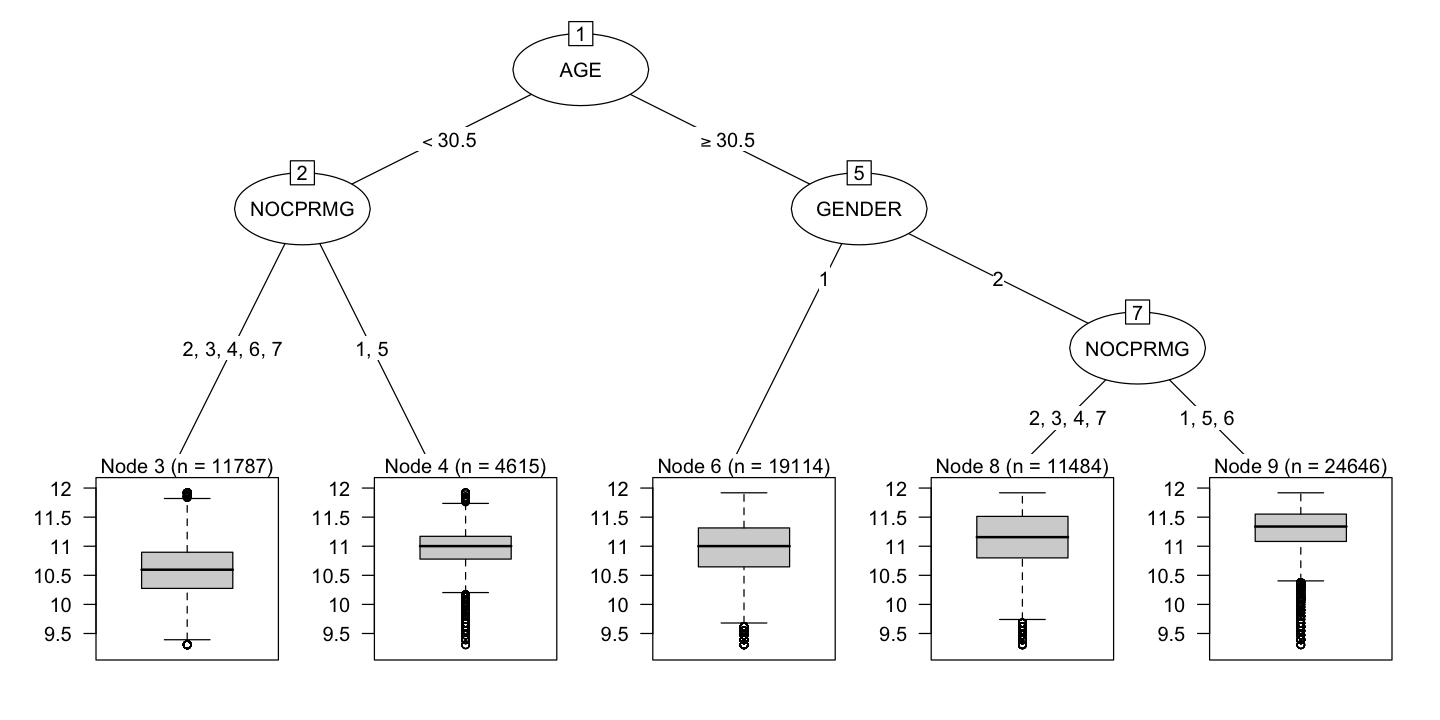

In [164]:
# Plot the optimized model
rpart.mod.opt.party <- as.party(rpart.mod.opt)
plot(rpart.mod.opt.party)
options(repr.plot.width=12, repr.plot.height=6)

In [150]:
# prediction for the training data
pred.tree.train <- predict(rpart.mod.opt, data = fc_train, method = "anova")
mse(pred.tree.train, log(fc_train$SALARY))

[1] 0.237417

In [151]:
# predicting the test data
pred.tree.test <- predict(rpart.mod.opt, fc_test)
mse(pred.tree.test, log(fc_test$SALARY))

[1] 0.2340882

### Random Forest


Call:
 randomForest(formula = log(SALARY) ~ ., data = train, ntree = 100,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 3

          Mean of squared residuals: 0.1775533
                    % Var explained: 40.52

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted       71646  -none- numeric  
mse               100  -none- numeric  
rsq               100  -none- numeric  
oob.times       71646  -none- numeric  
importance         20  -none- numeric  
importanceSD       10  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             11  -none- list     
coefs               0  -none- NULL     
y               71646  -none- numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

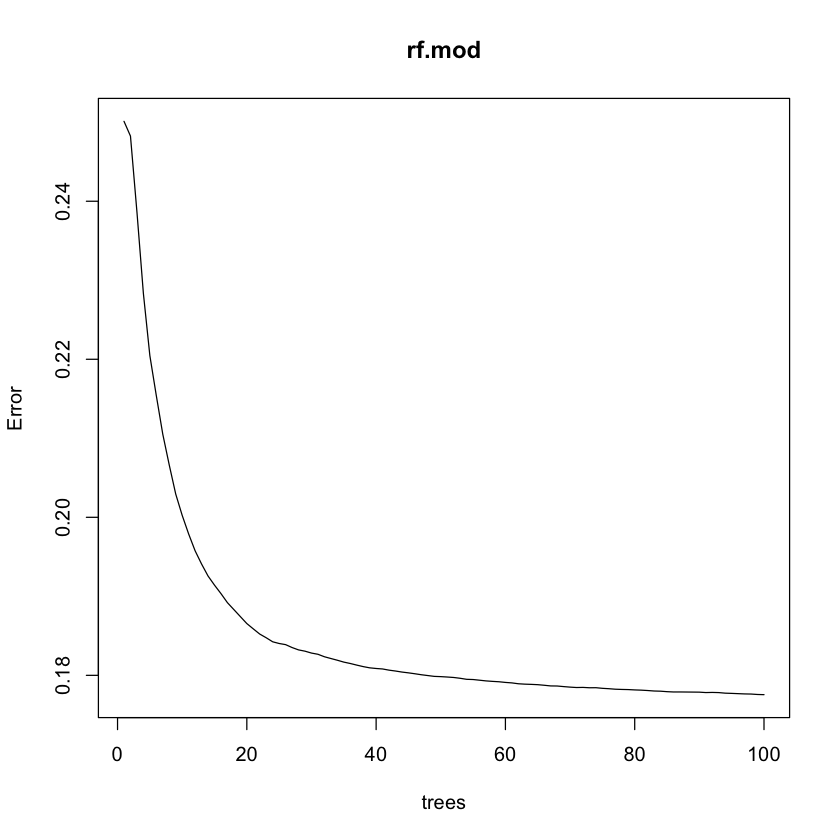

In [43]:
set.seed(12345)
rf.mod <- randomForest(log(SALARY)~., data = train, ntree = 100, importance = TRUE)
rf.mod
plot(rf.mod)
summary(rf.mod)

[1] 0.1049593

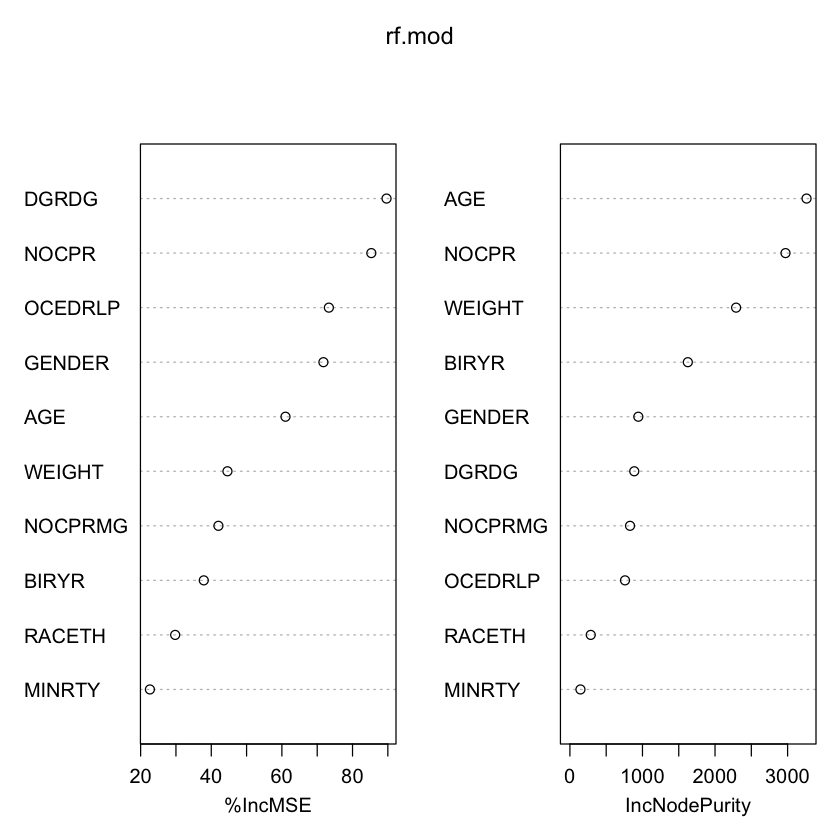

In [44]:
# predicting the train data
pred.rf.train <- predict(rf.mod, train)
mse(pred.rf.train, log(train$SALARY))
varImpPlot(rf.mod)

In [45]:
# predicting the test data
pred.rf.test <- predict(rf.mod, test)
mse(pred.rf.test, log(test$SALARY))
rmse(pred.rf.test, log(test$SALARY))
rmsle(pred.rf.test, log(test$SALARY))

[1] 0.1766434

[1] 0.4202897

[1] 0.03568744

### Stochastic Gradient Boosting (gbm)

gbm(formula = log(SALARY) ~ ., distribution = "gaussian", data = train, 
    n.trees = 5000, cv.folds = 5)
A gradient boosted model with gaussian loss function.
5000 iterations were performed.
The best cross-validation iteration was 4944.
There were 10 predictors of which 10 had non-zero influence.

,var,rel.inf
,<fct>,<dbl>
AGE,AGE,35.39742338
NOCPR,NOCPR,35.12675966
GENDER,GENDER,9.86647523
DGRDG,DGRDG,4.84512639
OCEDRLP,OCEDRLP,3.84662685
NOCPRMG,NOCPRMG,3.66941134
WEIGHT,WEIGHT,3.23476280
BIRYR,BIRYR,3.22251352
RACETH,RACETH,0.70832730


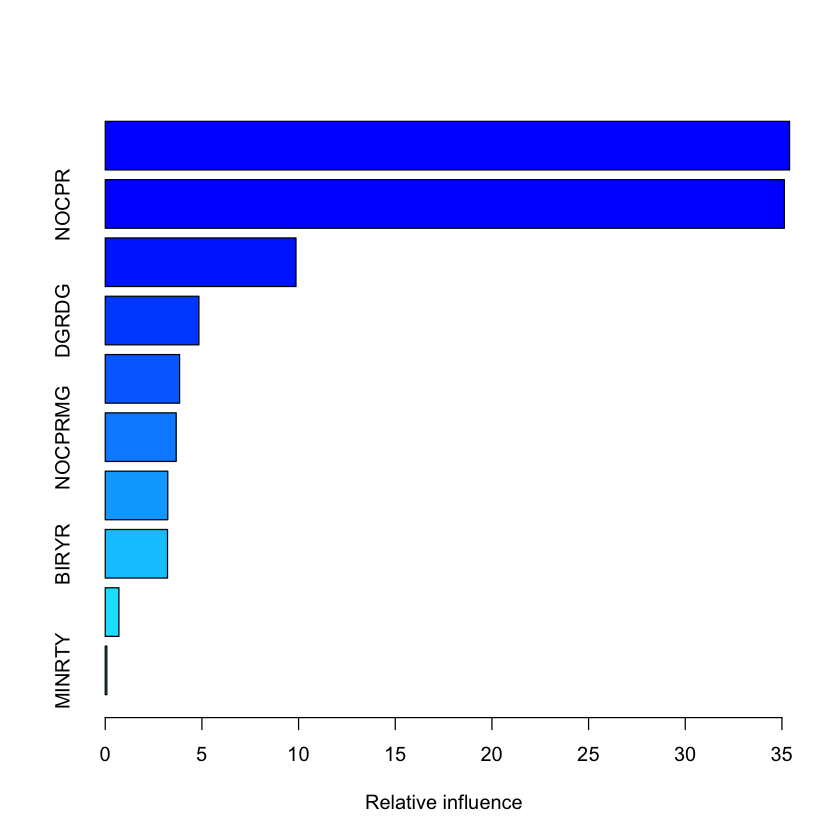

[1] 4944

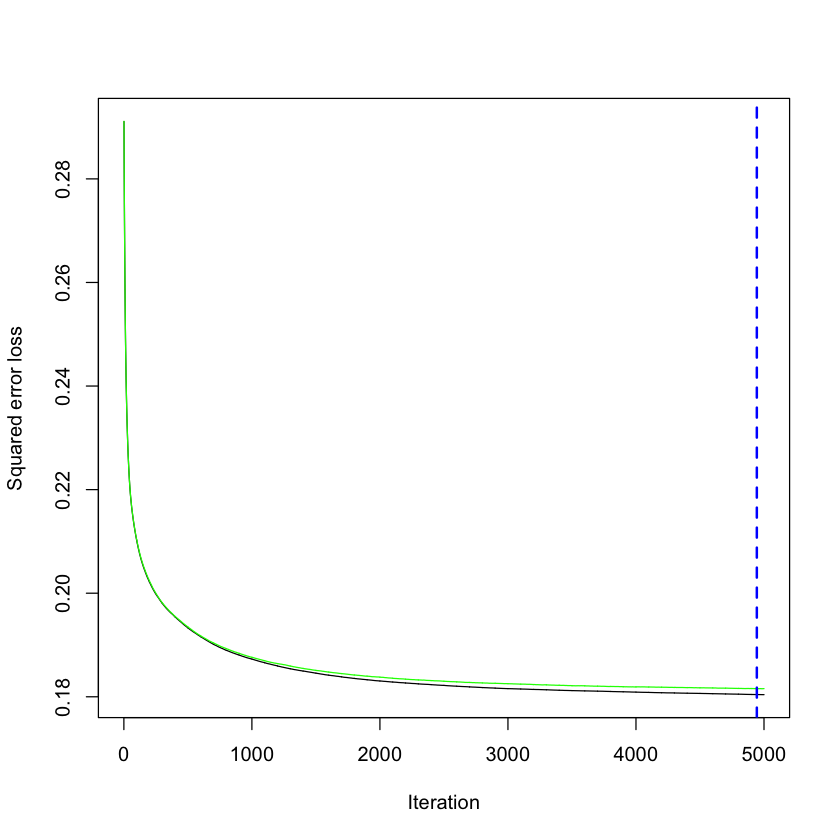

In [46]:
set.seed(078)
gbm.mod <- gbm(log(SALARY)~., data = train, cv.folds = 5, n.trees = 5000,
               distribution = "gaussian")
gbm.mod
summary(gbm.mod)
gbm.perf(gbm.mod)

In [47]:
# predicting the train data
pred.gbm.train <- predict(gbm.mod, train)
mse(pred.gbm.train, log(train$SALARY))

Using 4944 trees...


[1] 0.1804287

In [48]:
# predicting the test data
pred.gbm.test <- predict(gbm.mod, test)
mse(pred.gbm.test, log(test$SALARY))

Using 4944 trees...


[1] 0.1801945

### Extreme Gradient Boosting (XGBoost)

In [49]:
# xgboost
set.seed(9956) #(100)

# cross validation to get the best number of rounds
cv.xgb <- xgb.cv(data = as.matrix(train[, -11]), label = log(train$SALARY),
                 objective = "reg:linear",
                 nrounds = 200, nfold = 5, eta = 0.3, depth = 6)

(nround = which.min(cv.xgb$evaluation_log$test_rmse_mean))

[1]	train-rmse:7.388898+0.000367	test-rmse:7.388993+0.002072 
[2]	train-rmse:5.183387+0.000263	test-rmse:5.183369+0.002060 
[3]	train-rmse:3.643327+0.000244	test-rmse:3.643242+0.002256 
[4]	train-rmse:2.570638+0.000256	test-rmse:2.570480+0.002230 
[5]	train-rmse:1.827036+0.000265	test-rmse:1.827000+0.002355 
[6]	train-rmse:1.316451+0.000155	test-rmse:1.316764+0.002069 
[7]	train-rmse:0.970785+0.000669	test-rmse:0.971513+0.001946 
[8]	train-rmse:0.744022+0.000439	test-rmse:0.745460+0.001676 
[9]	train-rmse:0.601989+0.000509	test-rmse:0.604324+0.001034 
[10]	train-rmse:0.517667+0.000479	test-rmse:0.520849+0.000828 
[11]	train-rmse:0.469760+0.000583	test-rmse:0.473781+0.000747 
[12]	train-rmse:0.443835+0.000761	test-rmse:0.448647+0.000824 
[13]	train-rmse:0.429835+0.000508	test-rmse:0.435543+0.001020 
[14]	train-rmse:0.422138+0.000612	test-rmse:0.428501+0.001328 
[15]	train-rmse:0.417666+0.000570	test-rmse:0.424566+0.001524 
[16]	train-rmse:0.415016+0.000635	test-rmse:0.422449+0.001384 
[

[1] 59

In [54]:
# building the model
xgb.mod <- xgboost(data = as.matrix(train[,-11]),
                   label = log(train$SALARY),
                   nrounds = nround,
                   obejctive = "reg:linear",
                   eta = 0.3,
                   depth = 6)
summary(xgb.mod)

[1]	train-rmse:7.388839 
[2]	train-rmse:5.183163 
[3]	train-rmse:3.643155 
[4]	train-rmse:2.570079 
[5]	train-rmse:1.826597 
[6]	train-rmse:1.314646 
[7]	train-rmse:0.968581 
[8]	train-rmse:0.742575 
[9]	train-rmse:0.600145 
[10]	train-rmse:0.516390 
[11]	train-rmse:0.469048 
[12]	train-rmse:0.443578 
[13]	train-rmse:0.429140 
[14]	train-rmse:0.421668 
[15]	train-rmse:0.416675 
[16]	train-rmse:0.414468 
[17]	train-rmse:0.412568 
[18]	train-rmse:0.411803 
[19]	train-rmse:0.411095 
[20]	train-rmse:0.410344 
[21]	train-rmse:0.409550 
[22]	train-rmse:0.408812 
[23]	train-rmse:0.408170 
[24]	train-rmse:0.407573 
[25]	train-rmse:0.407428 
[26]	train-rmse:0.407030 
[27]	train-rmse:0.406584 
[28]	train-rmse:0.405896 
[29]	train-rmse:0.405349 
[30]	train-rmse:0.404643 
[31]	train-rmse:0.404541 
[32]	train-rmse:0.404105 
[33]	train-rmse:0.403640 
[34]	train-rmse:0.403053 
[35]	train-rmse:0.402630 
[36]	train-rmse:0.402199 
[37]	train-rmse:0.402004 
[38]	train-rmse:0.401475 
[39]	train-rmse:0.401

               Length Class              Mode       
handle              1 xgb.Booster.handle externalptr
raw            222705 -none-             raw        
niter               1 -none-             numeric    
evaluation_log      2 data.table         list       
call               16 -none-             call       
params              4 -none-             list       
callbacks           2 -none-             list       
feature_names      10 -none-             character  
nfeatures           1 -none-             numeric    

In [51]:
# predicting the train data
pred.xgb.train <- predict(xgb.mod, newdata = as.matrix(train[,-11]))
mse(pred.xgb.train, log(train$SALARY))

[1] 0.1621127

In [52]:
# predicting the test data
pred.xgb.test <- predict(xgb.mod, newdata = as.matrix(test[,-11]))
mse(pred.xgb.test, log(test$SALARY))

[1] 0.1725503

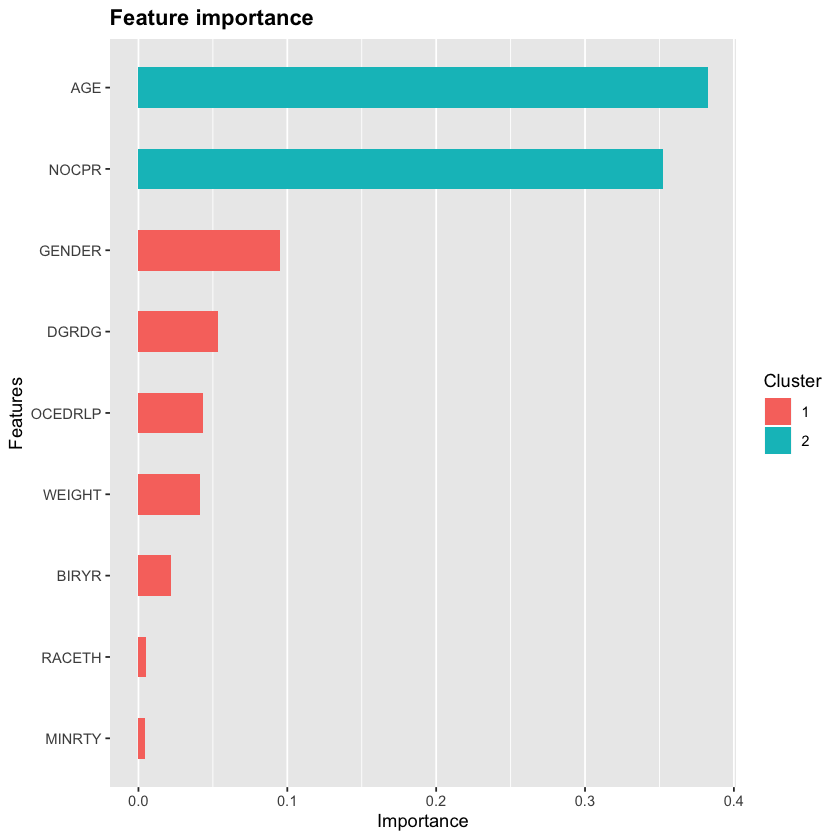

In [53]:
# plotting variable importance 
xgb.ggplot.importance(xgb.importance(model = xgb.mod))